# Exploratory_data_analysis

Conduct EDA on NBA players' attributes data to examine relations between their attributes and their salary

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from numpy import median
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from scipy import stats

## Load the data

In [2]:
# load the data
df = pd.read_csv('clean_data.csv')

In [3]:
# check out its appearance
df.head()

,DISPLAY_FIRST_LAST,SCHOOL,HEIGHT,WEIGHT,SEASON_EXP,JERSEY,POSITION,TEAM_NAME,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,PTS,AST,REB,PIE,current_avg_salary,age,year_played
0,Steven Adams,Pittsburgh,83.0,265.0,7,12,Center,Pelicans,2013,1,12,8.1,2.0,9.2,0.093,2.153090e+07,28,7
1,Bam Adebayo,Kentucky,81.0,255.0,3,13,Center-Forward,Heat,2017,1,14,19.2,5.4,9.5,0.167,2.620383e+07,24,3
2,LaMarcus Aldridge,Texas,83.0,250.0,14,12,Center-Forward,Spurs,2006,1,2,13.7,1.7,4.5,0.096,5.549880e+05,36,14
3,Grayson Allen,Duke,76.0,198.0,2,3,Guard,Grizzlies,2018,1,21,9.5,2.1,3.1,0.085,4.147610e+06,25,2
4,Jarrett Allen,Texas,83.0,243.0,3,31,Center,Cavaliers,2017,1,22,12.9,1.6,9.9,0.147,5.807674e+06,23,3


In [34]:
# set first last as index
df_newind = df.set_index('DISPLAY_FIRST_LAST')

In [41]:
df_newind.current_avg_salary.sort_values(ascending=False).head(10)

DISPLAY_FIRST_LAST
Stephen Curry            4.439366e+07
James Harden             4.431084e+07
John Wall                4.431084e+07
Russell Westbrook        4.421115e+07
Chris Paul               4.278498e+07
Paul George              4.234311e+07
Kevin Durant             4.201890e+07
LeBron James             4.162503e+07
Damian Lillard           4.157842e+07
Giannis Antetokounmpo    4.075877e+07
Name: current_avg_salary, dtype: float64

In [37]:
df_newind.PTS.sort_values(ascending=False).head(10)

DISPLAY_FIRST_LAST
Bradley Beal             31.8
Damian Lillard           30.1
Joel Embiid              29.9
Stephen Curry            29.0
Giannis Antetokounmpo    29.0
Name: PTS, dtype: float64

In [38]:
df_newind.AST.sort_values(ascending=False).head()

DISPLAY_FIRST_LAST
James Harden         11.2
Russell Westbrook    10.3
Trae Young            9.4
Luka Doncic           9.2
Chris Paul            8.8
Name: AST, dtype: float64

In [39]:
df_newind.REB.sort_values(ascending=False).head()

DISPLAY_FIRST_LAST
Clint Capela             14.2
Andre Drummond           13.5
Rudy Gobert              13.4
Jonas Valanciunas        12.3
Giannis Antetokounmpo    11.7
Name: REB, dtype: float64

In [40]:
df_newind.PIE.sort_values(ascending=False).head()

DISPLAY_FIRST_LAST
Joel Embiid              0.211
Nikola Jokic             0.205
Giannis Antetokounmpo    0.196
LeBron James             0.194
Jimmy Butler             0.190
Name: PIE, dtype: float64

In [48]:
df_newind.index

Index(['Drew Eubanks', 'Cristiano Felicio', 'Tacko Fall', 'Chasson Randle',
       'PJ Dozier', 'Boban Marjanovic', 'Luguentz Dort', 'Naz Reid',
       'Matthew Dellavedova', 'Terence Davis',
       ...
       'Monte Morris', 'Jalen McDaniels', 'Edmond Sumner', 'Shake Milton',
       'Patty Mills', 'E'Twaun Moore', 'Miye Oni', 'Abdel Nader',
       'Isaiah Thomas', 'Kostas Antetokounmpo'],
      dtype='object', name='DISPLAY_FIRST_LAST', length=353)

<AxesSubplot:>

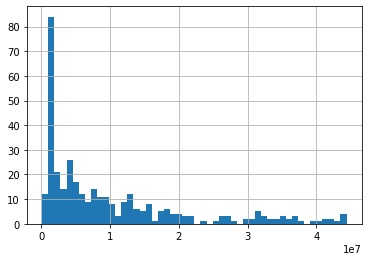

In [5]:
# The dependent vaiable is current_avg_salary.
# Making a historgram of it
df['current_avg_salary'].hist(bins=50)

In [11]:
df_star = df[(np.abs(stats.zscore(df['current_avg_salary'])) > 1.645 )]
df_non_star = df[(np.abs(stats.zscore(df['current_avg_salary'])) < 1.645 )]

In [16]:
df_non_star['current_avg_salary'].mean()

7119724.083175605

<AxesSubplot:xlabel='current_avg_salary', ylabel='Count'>

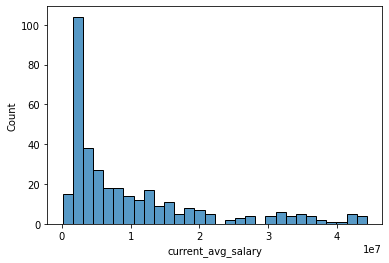

In [7]:
sns.histplot(data=df, x="current_avg_salary", bins = 30)

Non-normal distrubution

In [12]:
df_star.head()

,DISPLAY_FIRST_LAST,SCHOOL,HEIGHT,WEIGHT,SEASON_EXP,JERSEY,POSITION,TEAM_NAME,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,PTS,AST,REB,PIE,current_avg_salary,age,year_played
6,Giannis Antetokounmpo,Filathlitikos,83.0,242.0,7,34,Forward,Bucks,2013,1,15,29.0,6.4,11.7,0.196,4.075877e+07,26,7
25,Bradley Beal,Florida,75.0,207.0,8,3,Guard,Wizards,2012,1,3,31.8,4.6,5.1,0.154,3.296604e+07,28,8
38,Devin Booker,Kentucky,77.0,206.0,5,1,Guard,Suns,2015,1,13,25.1,4.6,4.0,0.126,3.274200e+07,24,5
57,Jimmy Butler,Marquette,79.0,230.0,9,22,Forward,Heat,2011,1,30,21.3,7.3,7.9,0.190,3.601620e+07,31,9
70,Mike Conley,Ohio State,73.0,175.0,13,10,Guard,Jazz,2007,1,4,16.4,5.5,3.4,0.125,3.450213e+07,33,13


<AxesSubplot:xlabel='current_avg_salary', ylabel='Count'>

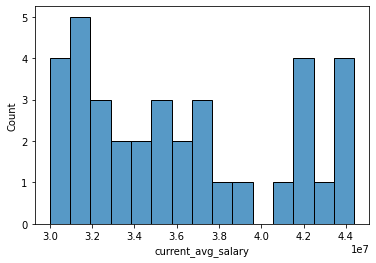

In [14]:
sns.histplot(data=df_star, x="current_avg_salary", bins = 15)

<AxesSubplot:xlabel='current_avg_salary', ylabel='Count'>

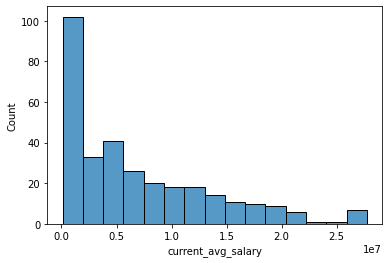

In [15]:
sns.histplot(data=df_non_star, x="current_avg_salary", bins = 15)

In [17]:
df['current_avg_salary'].describe()

count    3.530000e+02
mean     1.009223e+07
std      1.084653e+07
min      9.902000e+04
25%      1.842959e+06
50%      5.655148e+06
75%      1.366667e+07
max      4.439366e+07
Name: current_avg_salary, dtype: float64

In [18]:
df['current_avg_salary'].median()

5655148.25

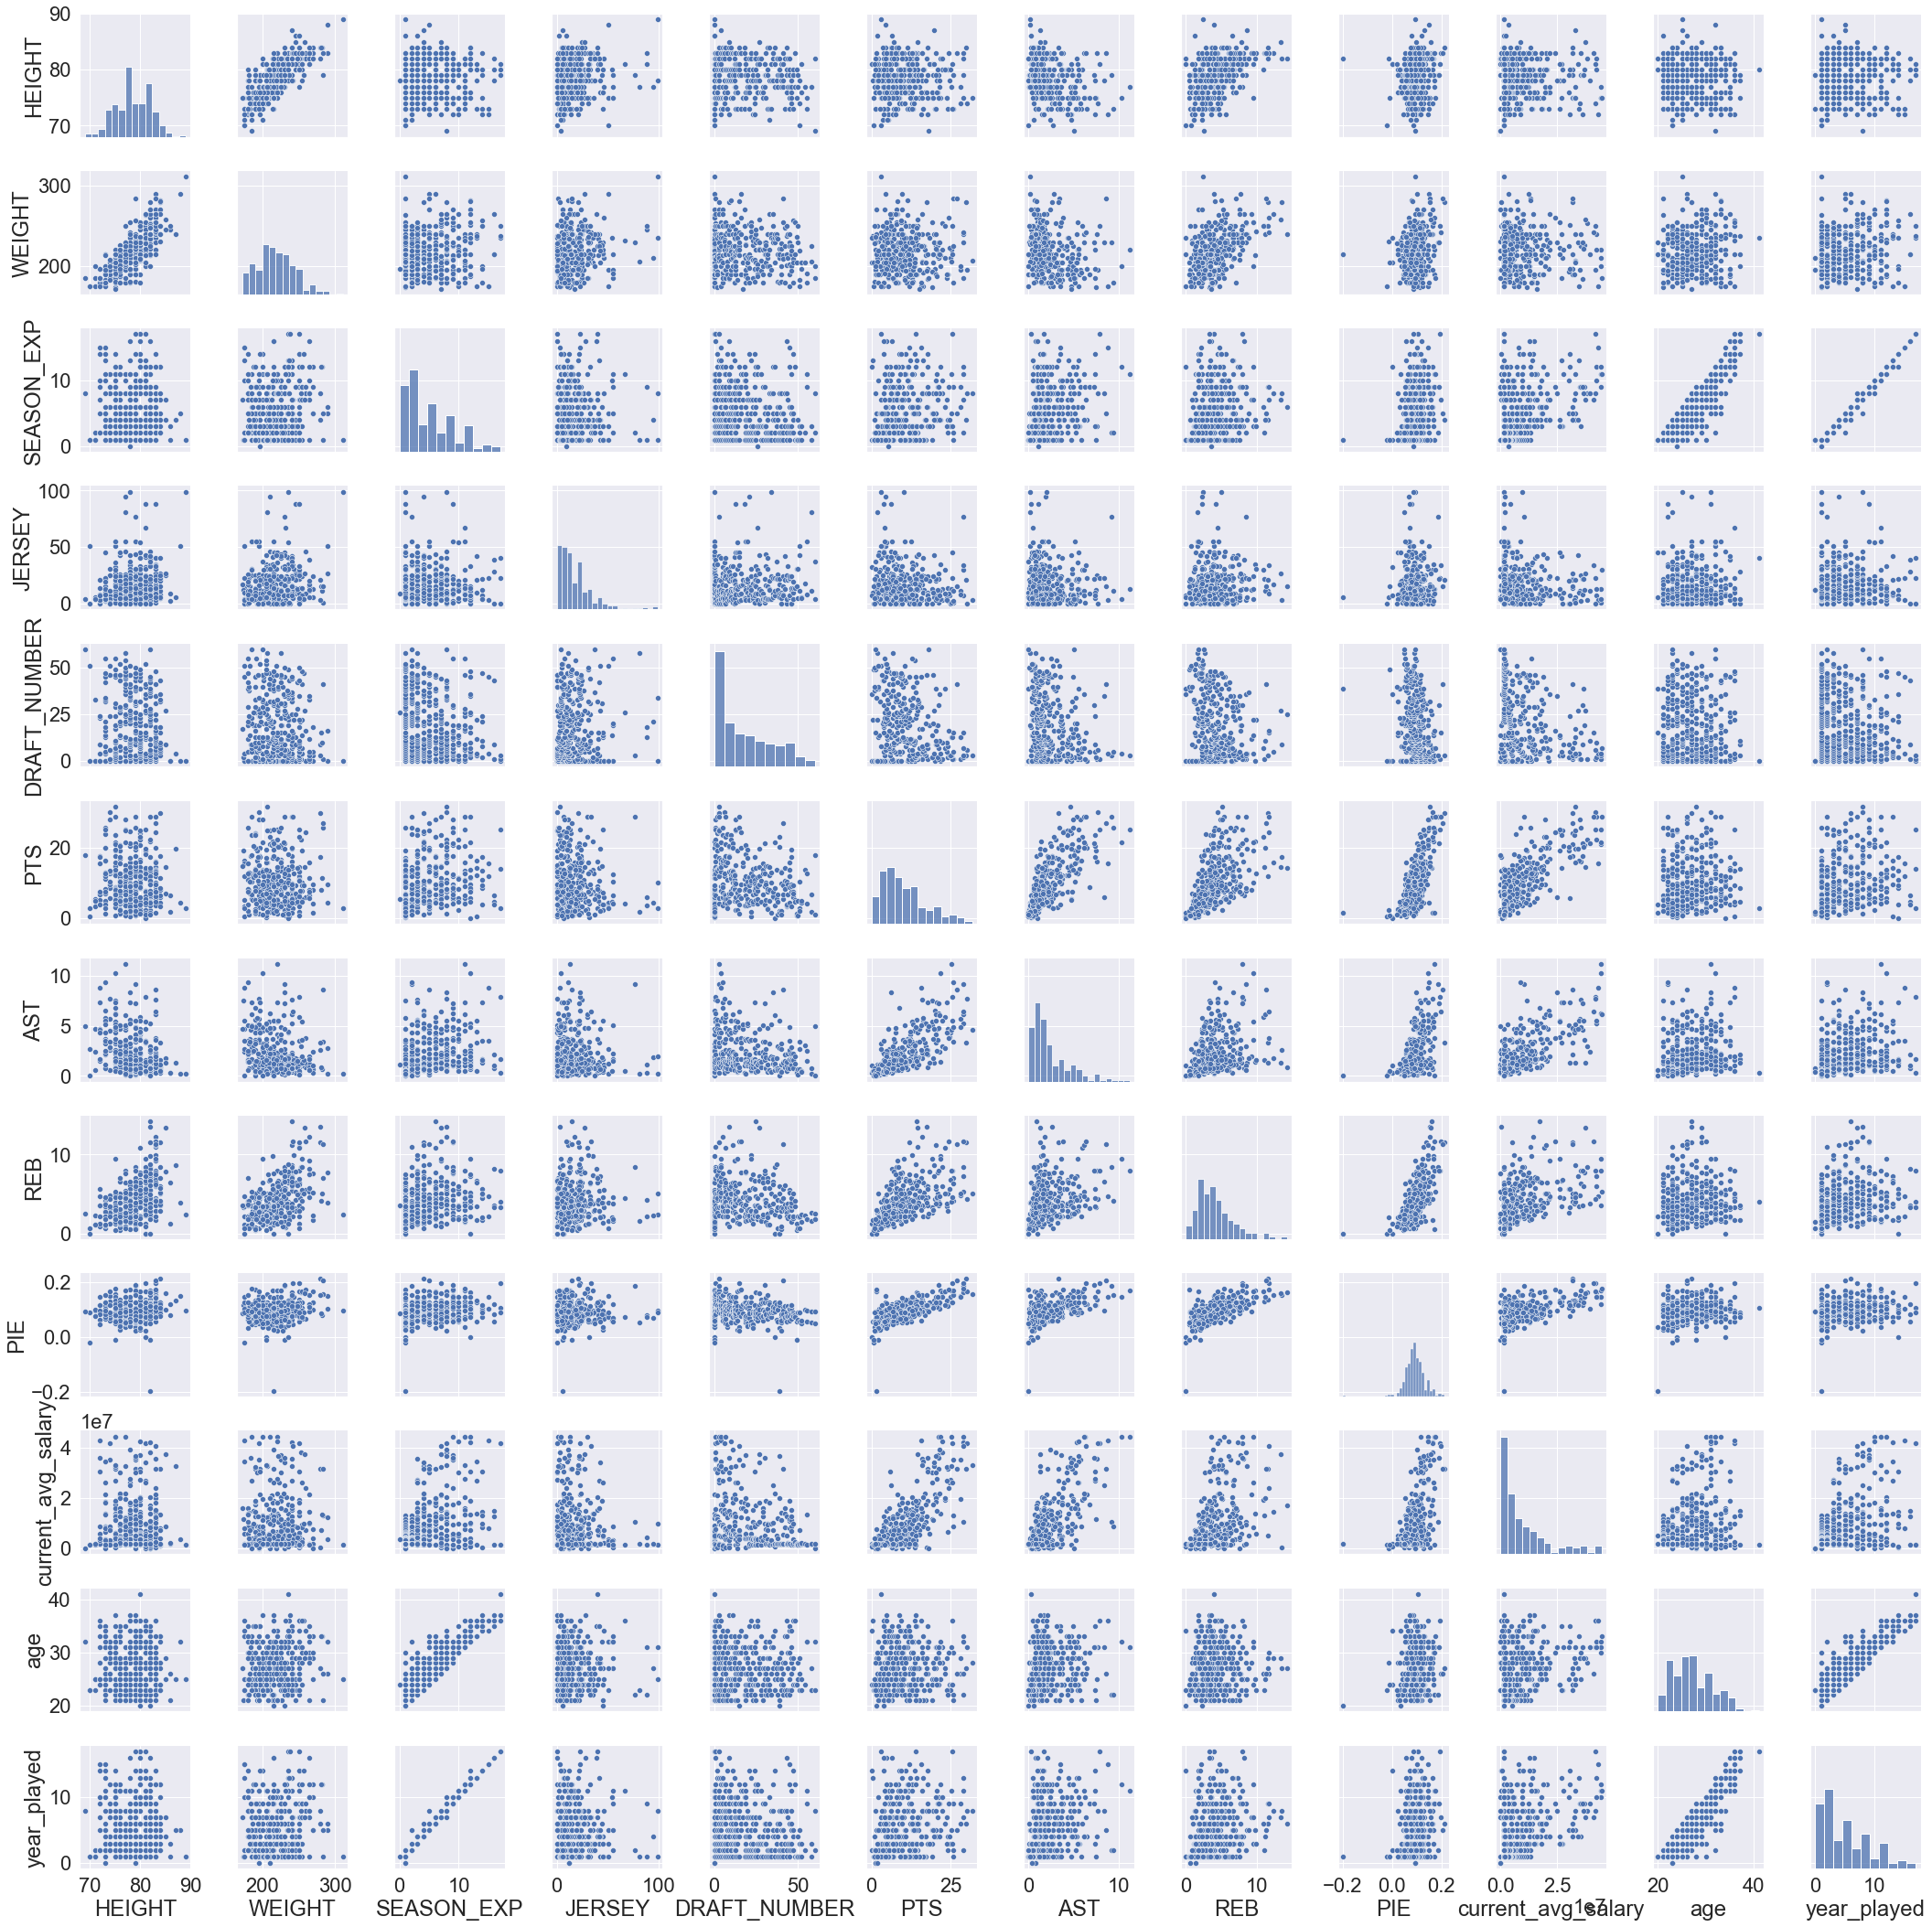

In [44]:
# Make a pairplot of the data
# color columns
# increase the form
sns.set(font_scale=2, color_codes = True)
g = sns.pairplot(df)


Look like PTS, AST, REB and PIE have strong correlation with salary. It is interesting that height and weight seems do not have correlation with salary. One reason could be NBA players have similar height and weight at the same position.

<AxesSubplot:>

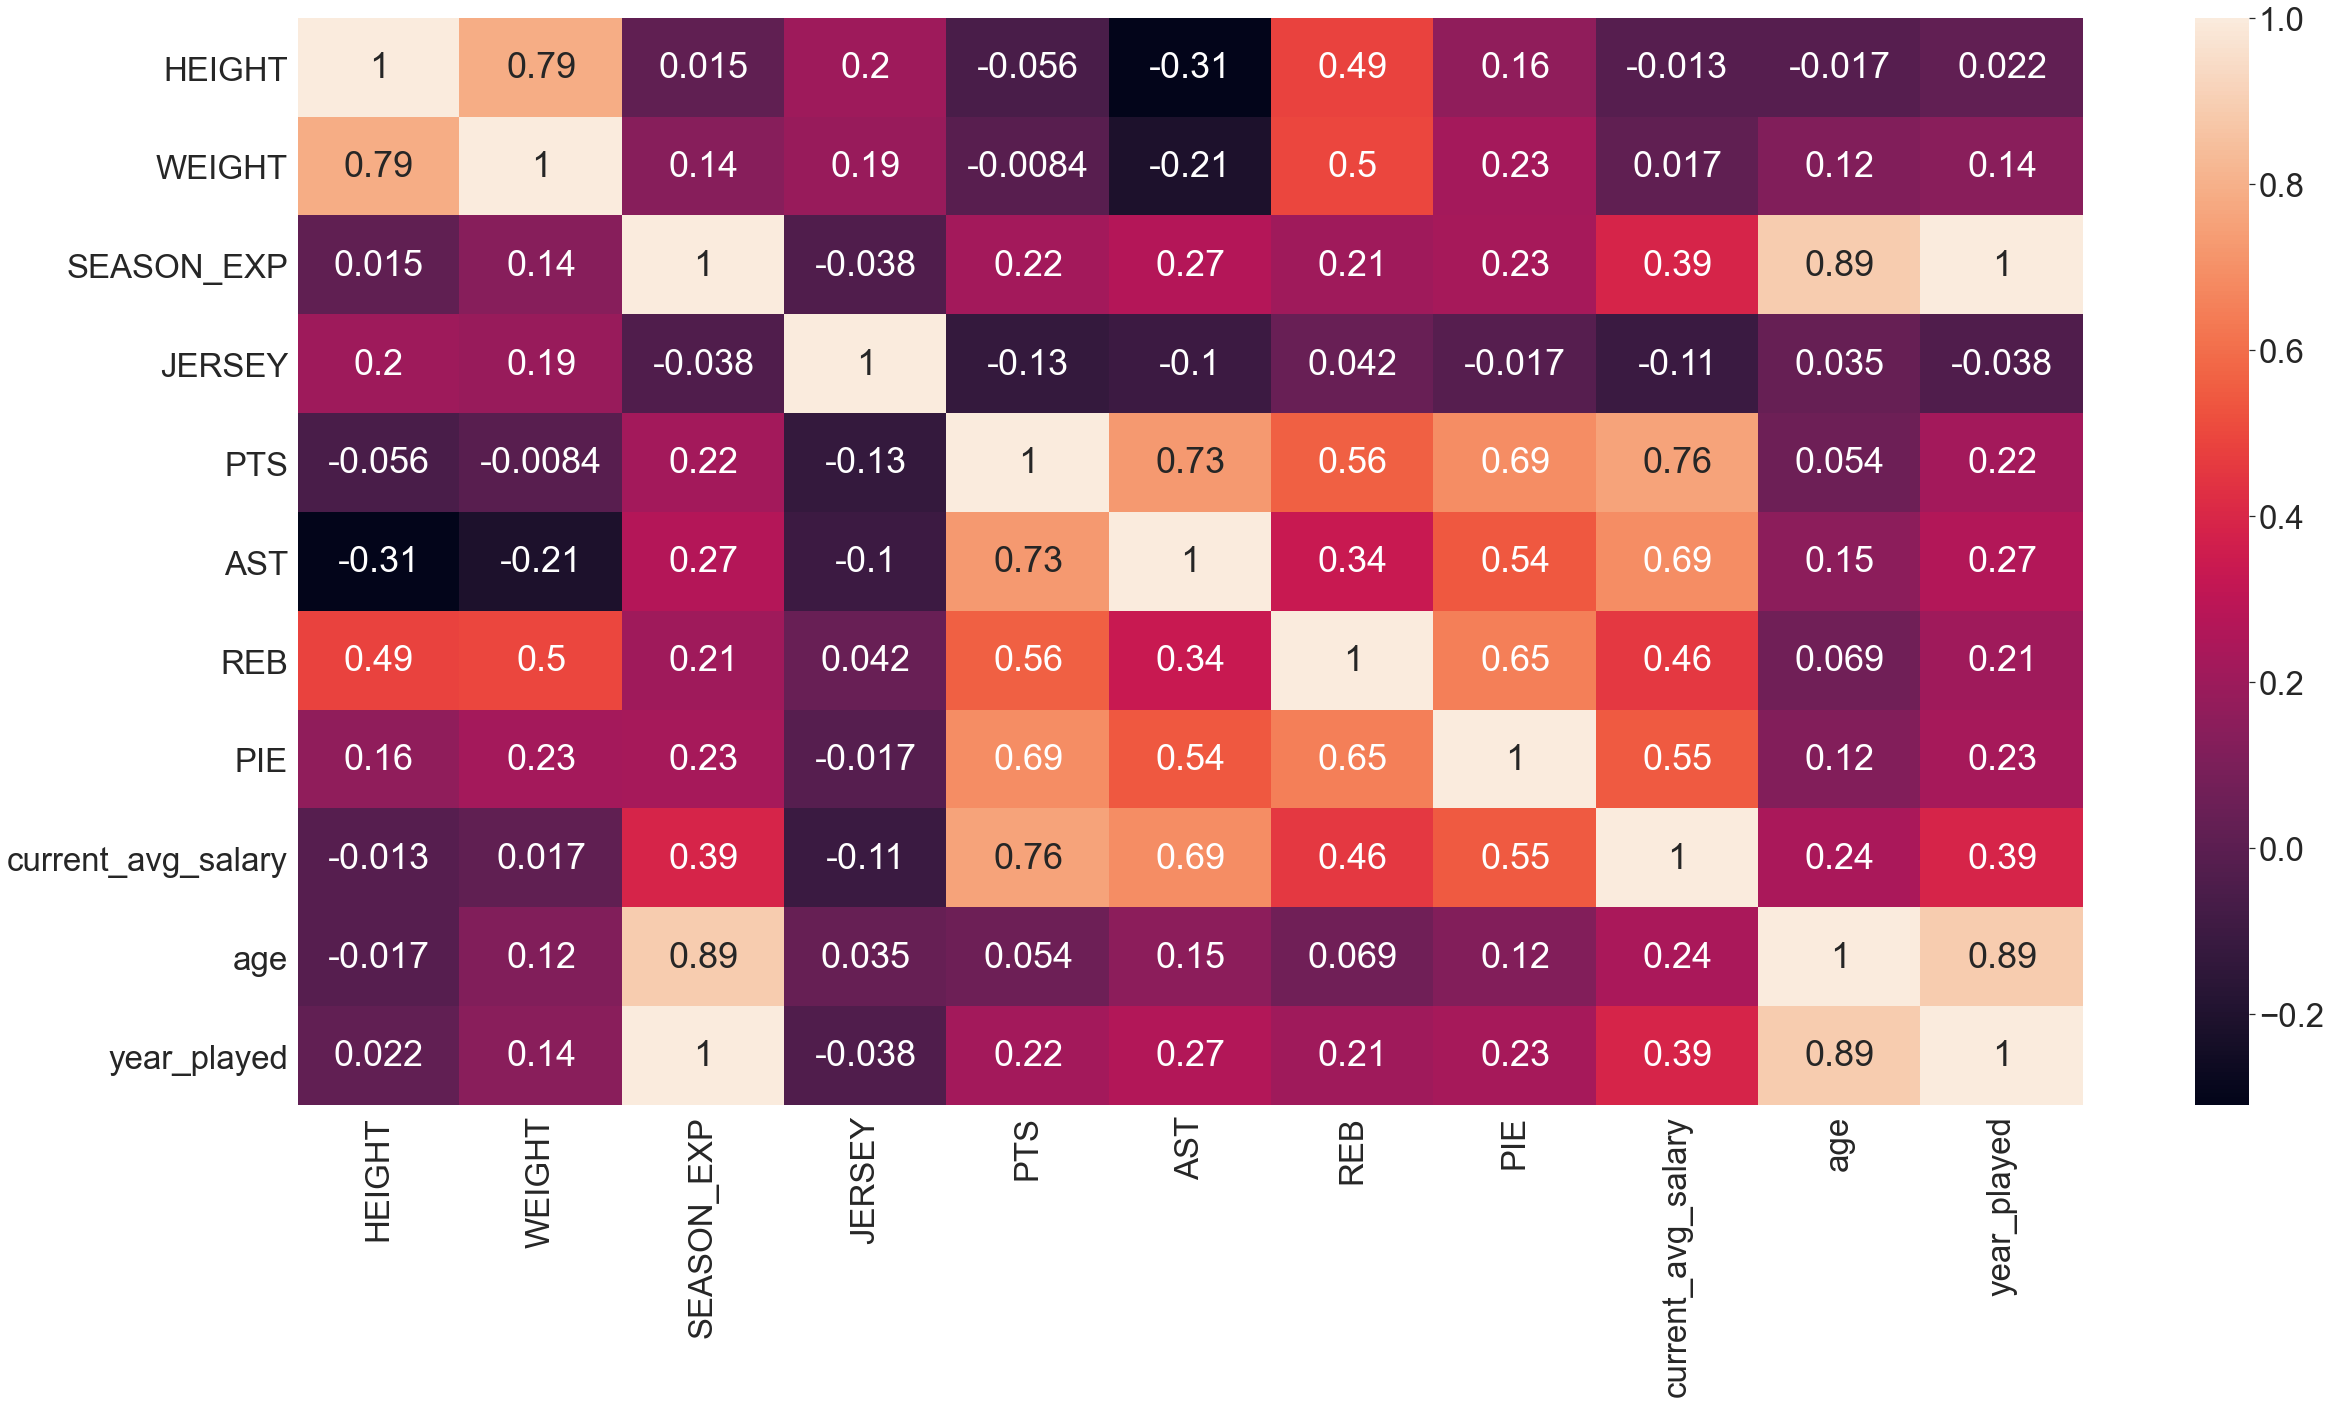

In [20]:
# Make a heatmap of the data
sns.set(font_scale=3)
plt.figure(figsize=(40,20))
sns.heatmap(df.corr(), annot=True)

Look like PTS, AST, REB and PIE have strong correlation with salary

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DISPLAY_FIRST_LAST  353 non-null    object 
 1   SCHOOL              353 non-null    object 
 2   HEIGHT              353 non-null    float64
 3   WEIGHT              353 non-null    float64
 4   SEASON_EXP          353 non-null    int64  
 5   JERSEY              353 non-null    int64  
 6   POSITION            353 non-null    object 
 7   TEAM_NAME           353 non-null    object 
 8   DRAFT_YEAR          353 non-null    object 
 9   DRAFT_ROUND         353 non-null    object 
 10  DRAFT_NUMBER        353 non-null    object 
 11  PTS                 353 non-null    float64
 12  AST                 353 non-null    float64
 13  REB                 353 non-null    float64
 14  PIE                 353 non-null    float64
 15  current_avg_salary  353 non-null    float64
 16  age     

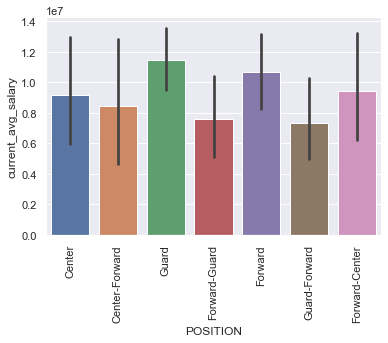

In [22]:
# Now look at categorically varibles
# make bar plot position against salary
sns.set(font_scale=1)
g = sns.barplot(x='POSITION', y='current_avg_salary', data=df, )
g.set_xticklabels(g.get_xticklabels(), rotation=90);

Guard has the highest average salary

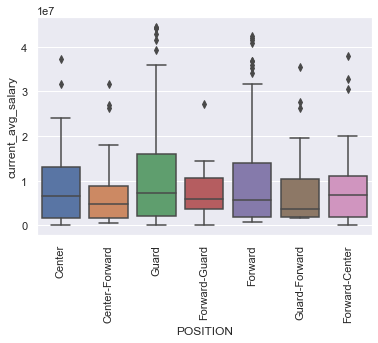

In [23]:
# make box plot to see if there any outliner
sns.set(font_scale=1)
g = sns.boxplot(x='POSITION', y='current_avg_salary', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

Seem like there is more outliner in Guard and Forward

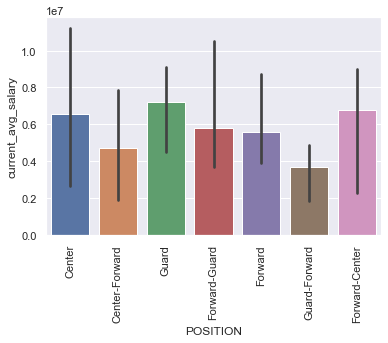

In [24]:
# plot position against salary using median
sns.set(font_scale=1)
g = sns.barplot(x='POSITION', y='current_avg_salary', data=df, estimator=median)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

with median, guard's salary is much lower than mean, but still the high. Forward became fifth instead of second. 

In [25]:
df = df.replace('Undrafted', 0, regex=True)

In [26]:
df['DRAFT_NUMBER'] = df['DRAFT_NUMBER'].astype(str).astype(int)

In [27]:
df = df.sort_values(by=['DRAFT_NUMBER'], ascending=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 100 to 7
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DISPLAY_FIRST_LAST  353 non-null    object 
 1   SCHOOL              353 non-null    object 
 2   HEIGHT              353 non-null    float64
 3   WEIGHT              353 non-null    float64
 4   SEASON_EXP          353 non-null    int64  
 5   JERSEY              353 non-null    int64  
 6   POSITION            353 non-null    object 
 7   TEAM_NAME           353 non-null    object 
 8   DRAFT_YEAR          353 non-null    object 
 9   DRAFT_ROUND         353 non-null    object 
 10  DRAFT_NUMBER        353 non-null    int32  
 11  PTS                 353 non-null    float64
 12  AST                 353 non-null    float64
 13  REB                 353 non-null    float64
 14  PIE                 353 non-null    float64
 15  current_avg_salary  353 non-null    float64
 16  age     

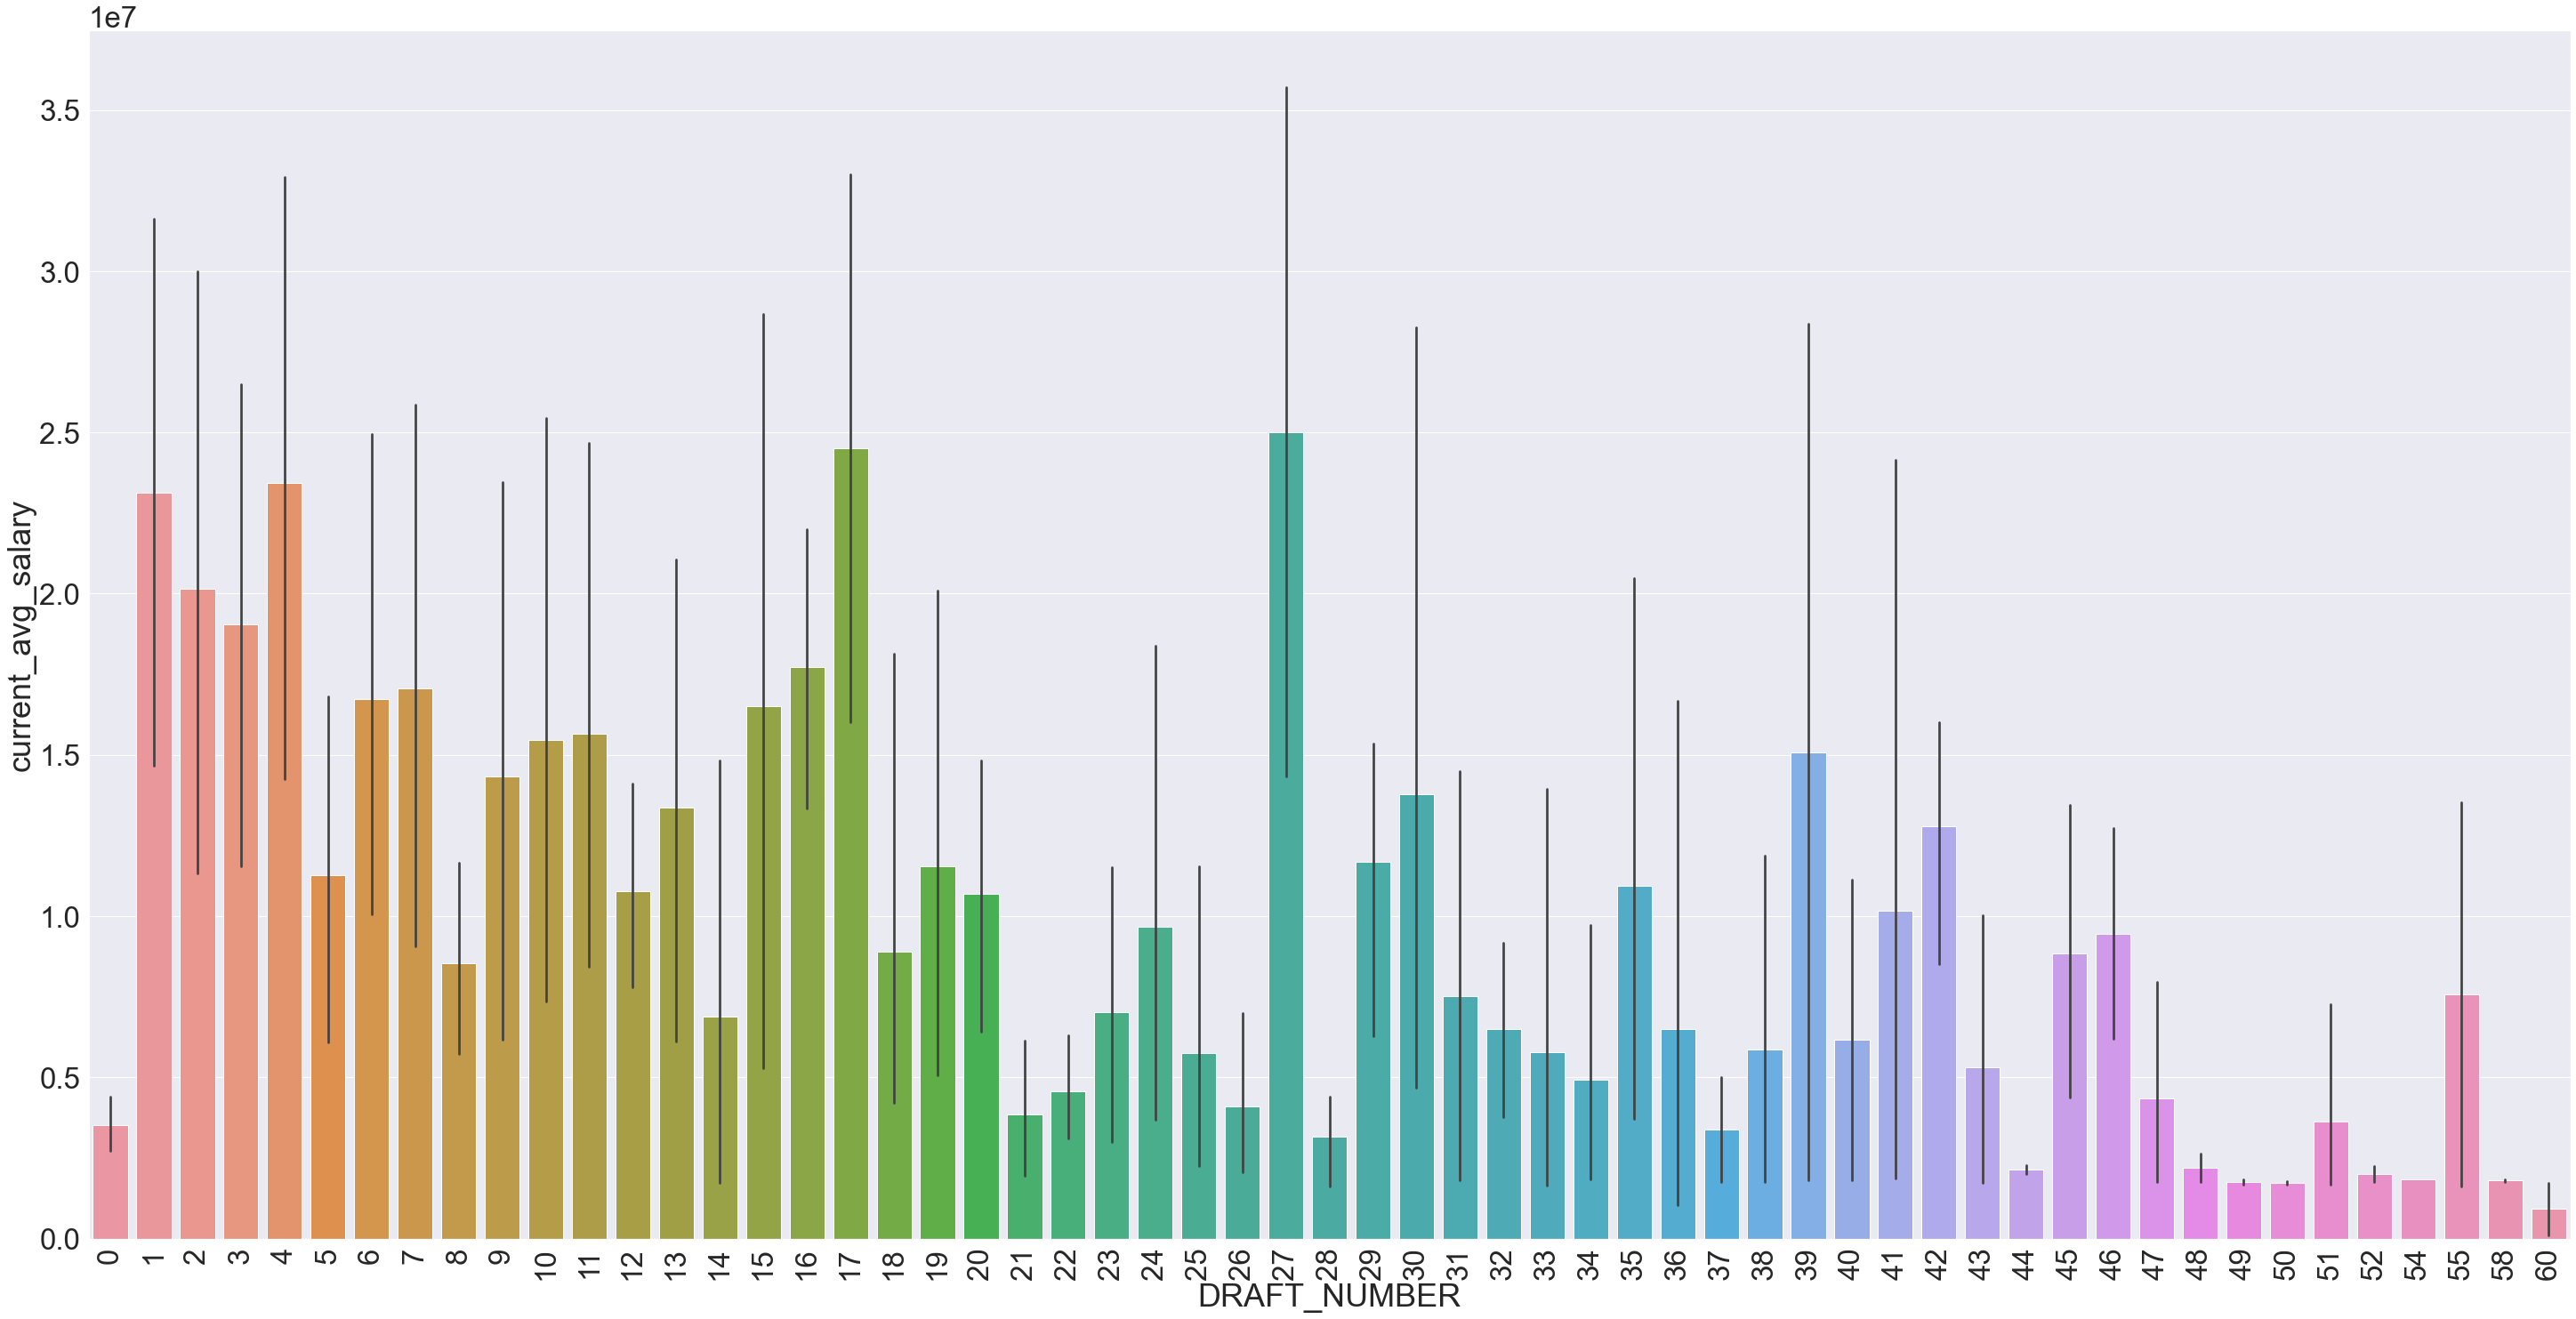

In [29]:
# plot draft-number against salary
sns.set(font_scale=3)
a4_dims = (50, 25)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.barplot(x=('DRAFT_NUMBER'), y='current_avg_salary', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

Seems the first four draft_number 1-4 have the high salary. 27 and 17 also very hight.

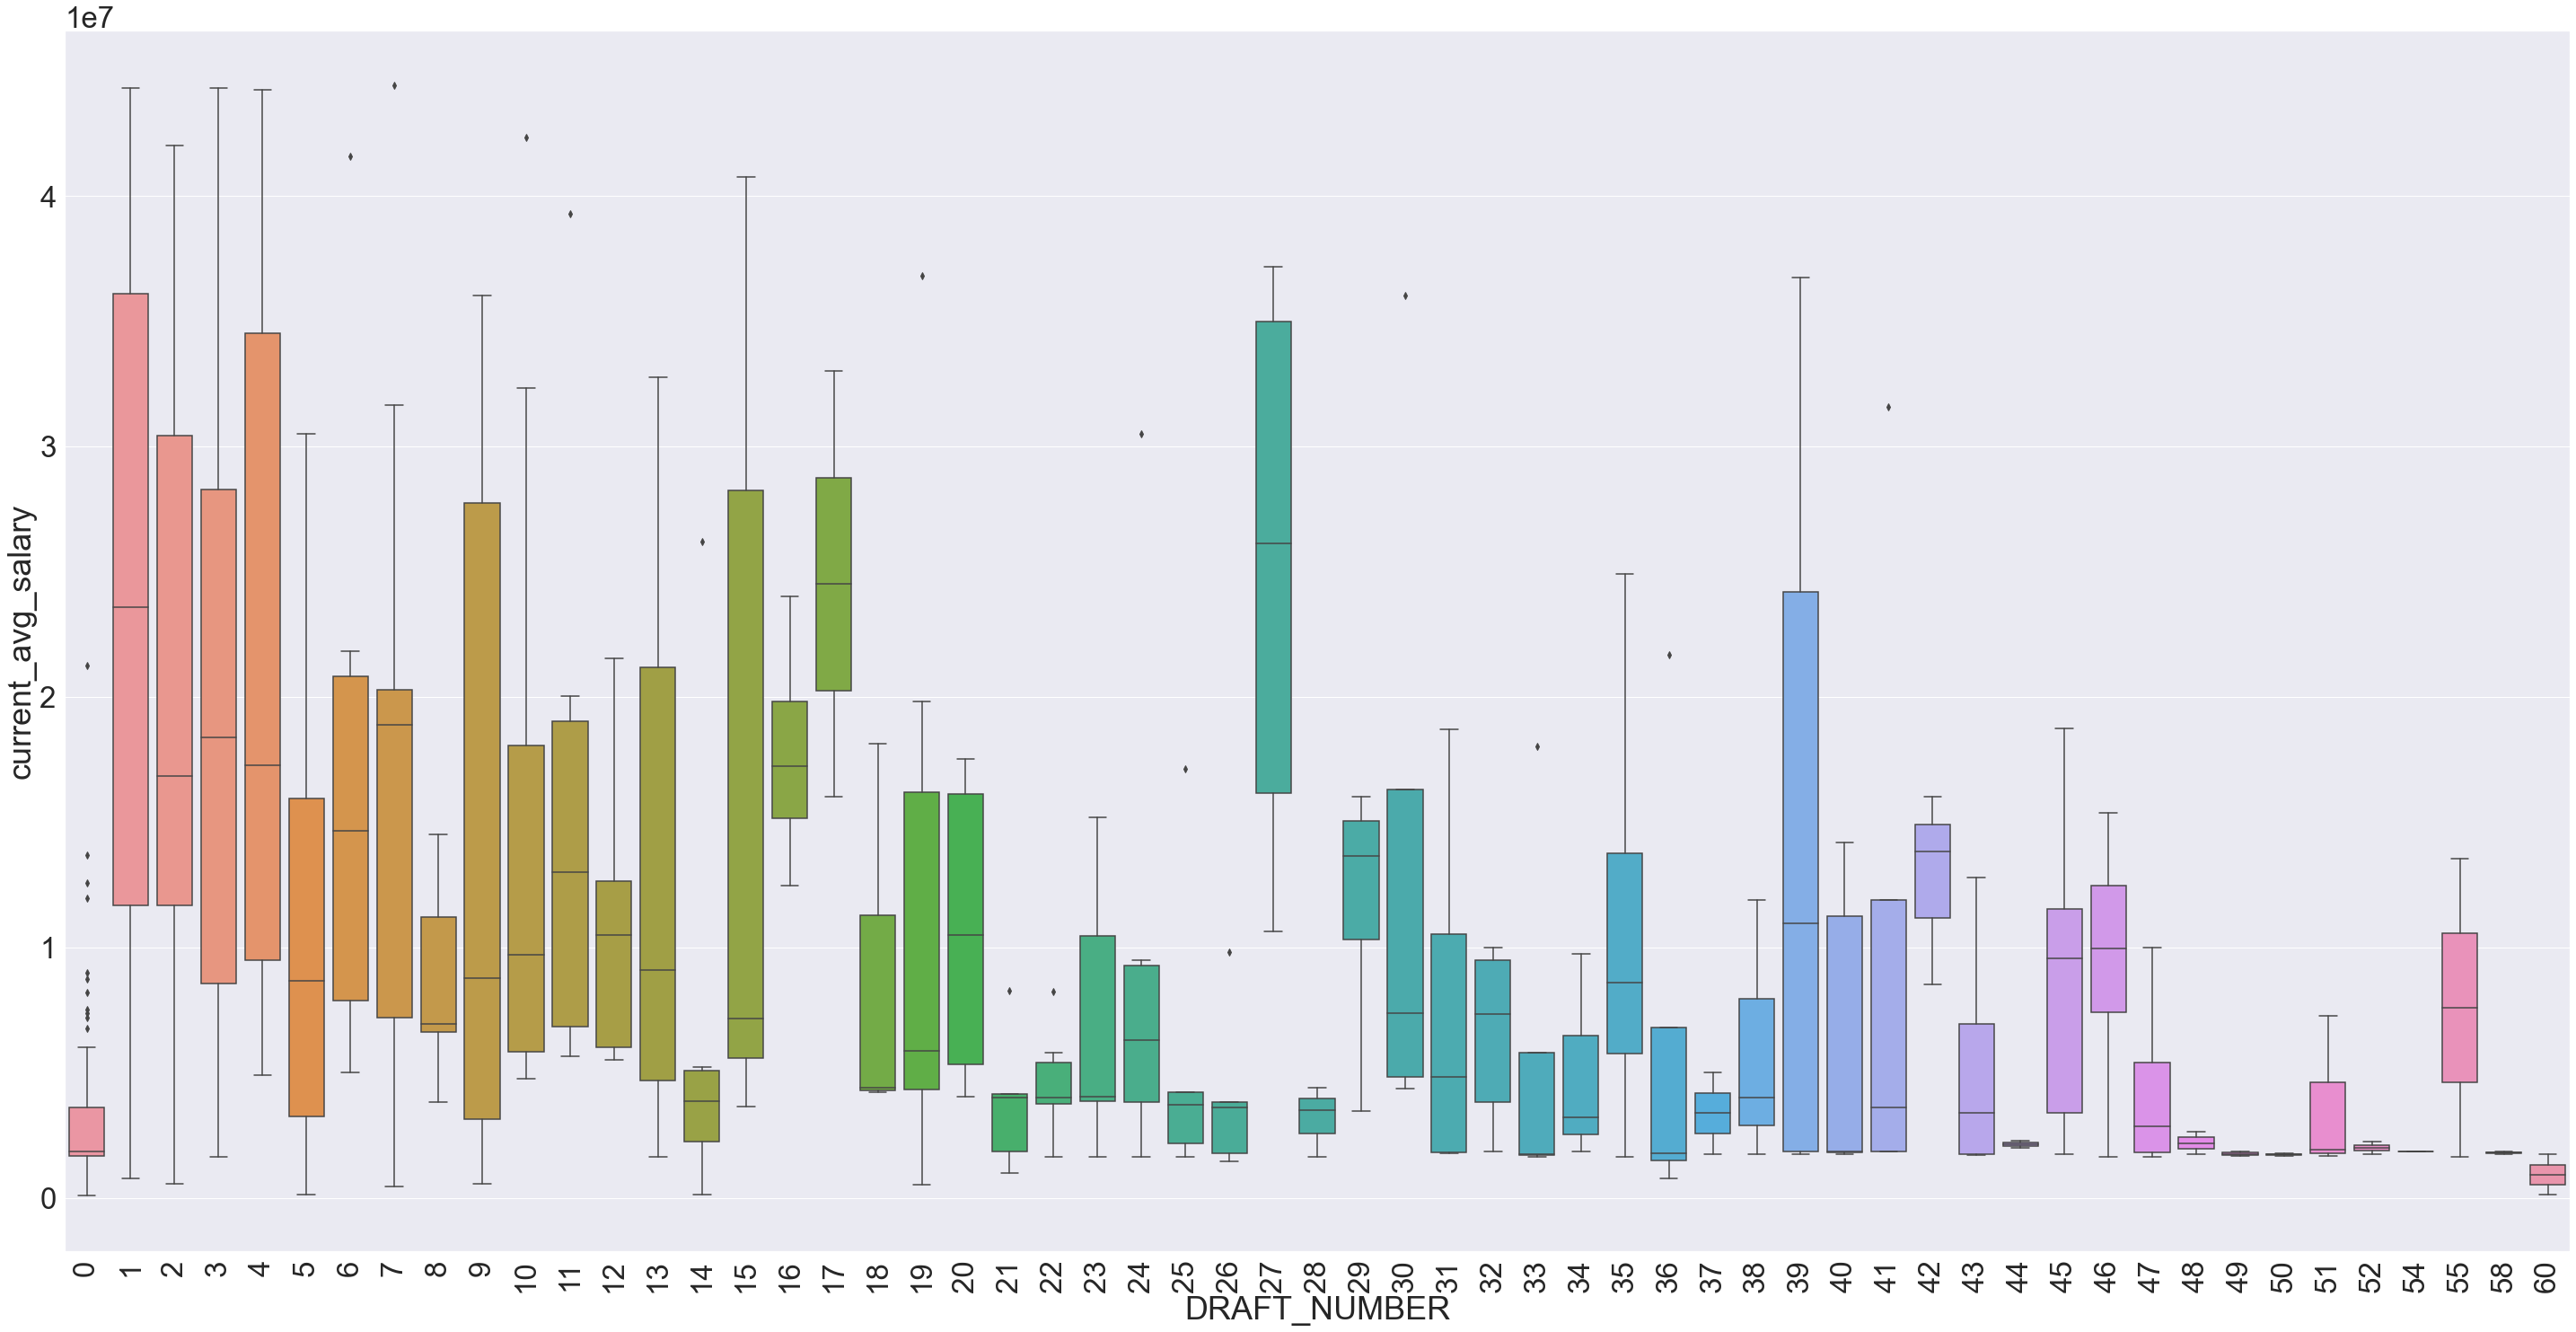

In [30]:
# make boxplot to see if there are outliners
sns.set(font_scale=3)
a4_dims = (50, 25)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(x='DRAFT_NUMBER', y='current_avg_salary', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

No outliners. look simiar as the bar plot. It is interesting that 17 and 27 have very salary

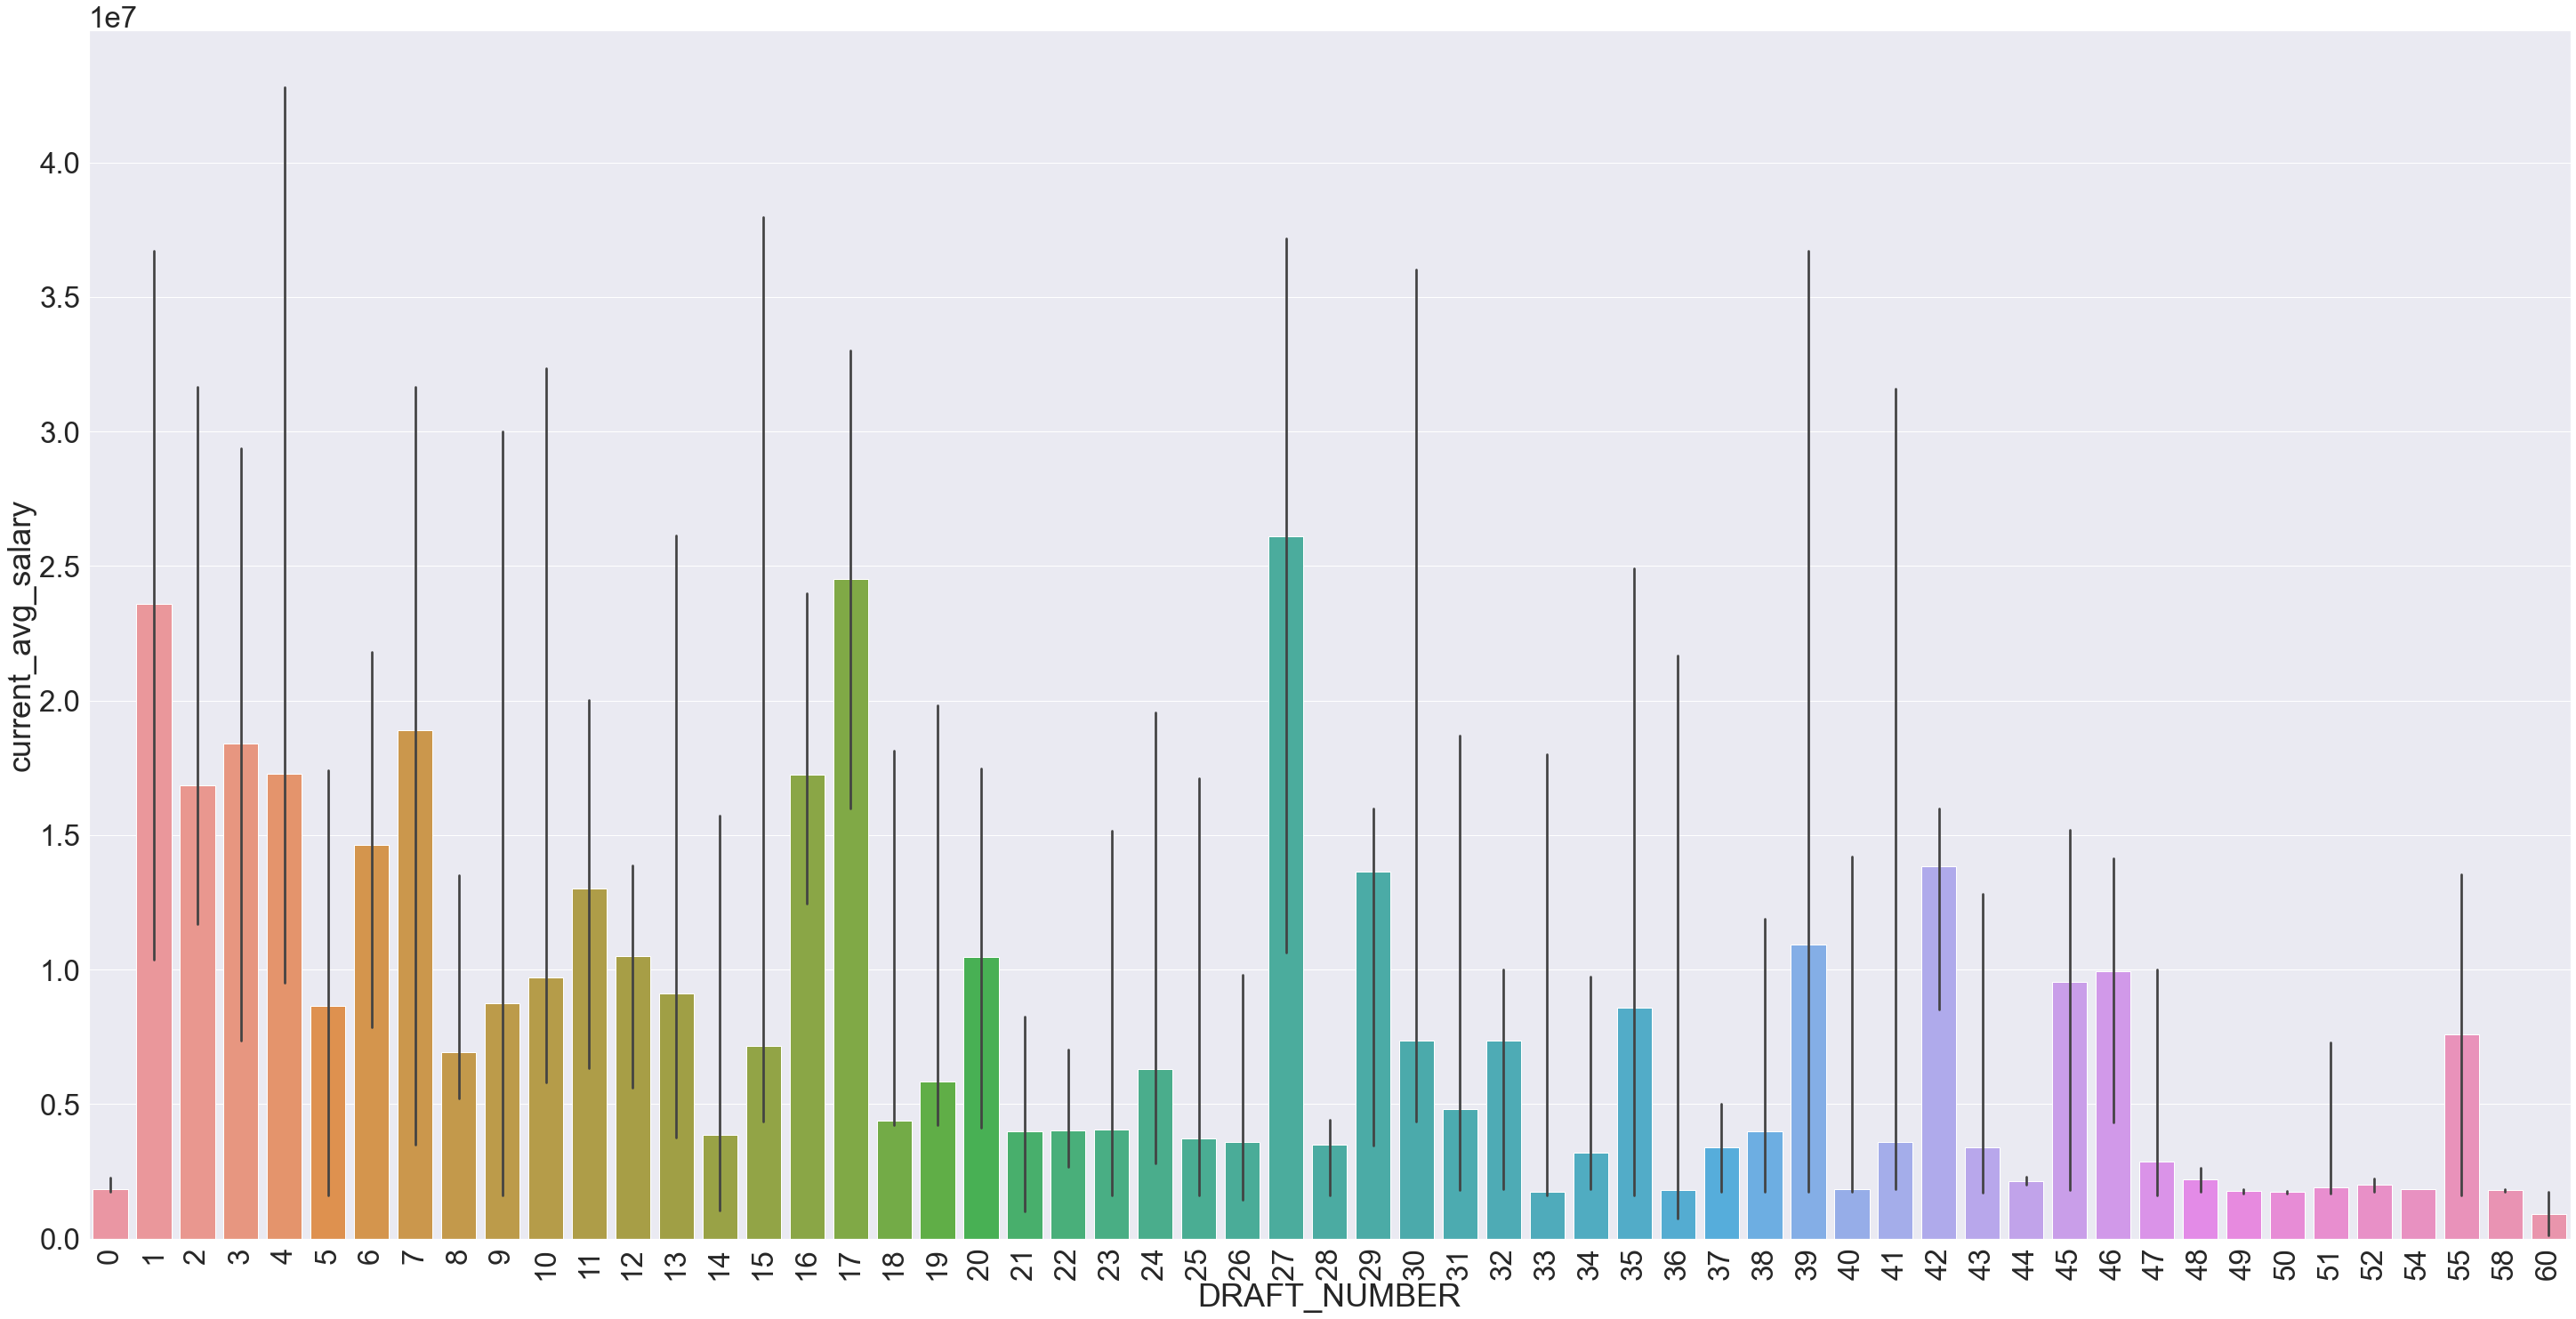

In [31]:
# plot draft-number against salary using median
sns.set(font_scale=3)
a4_dims = (50, 25)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.barplot(x='DRAFT_NUMBER', y='current_avg_salary', data=df, estimator=median)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

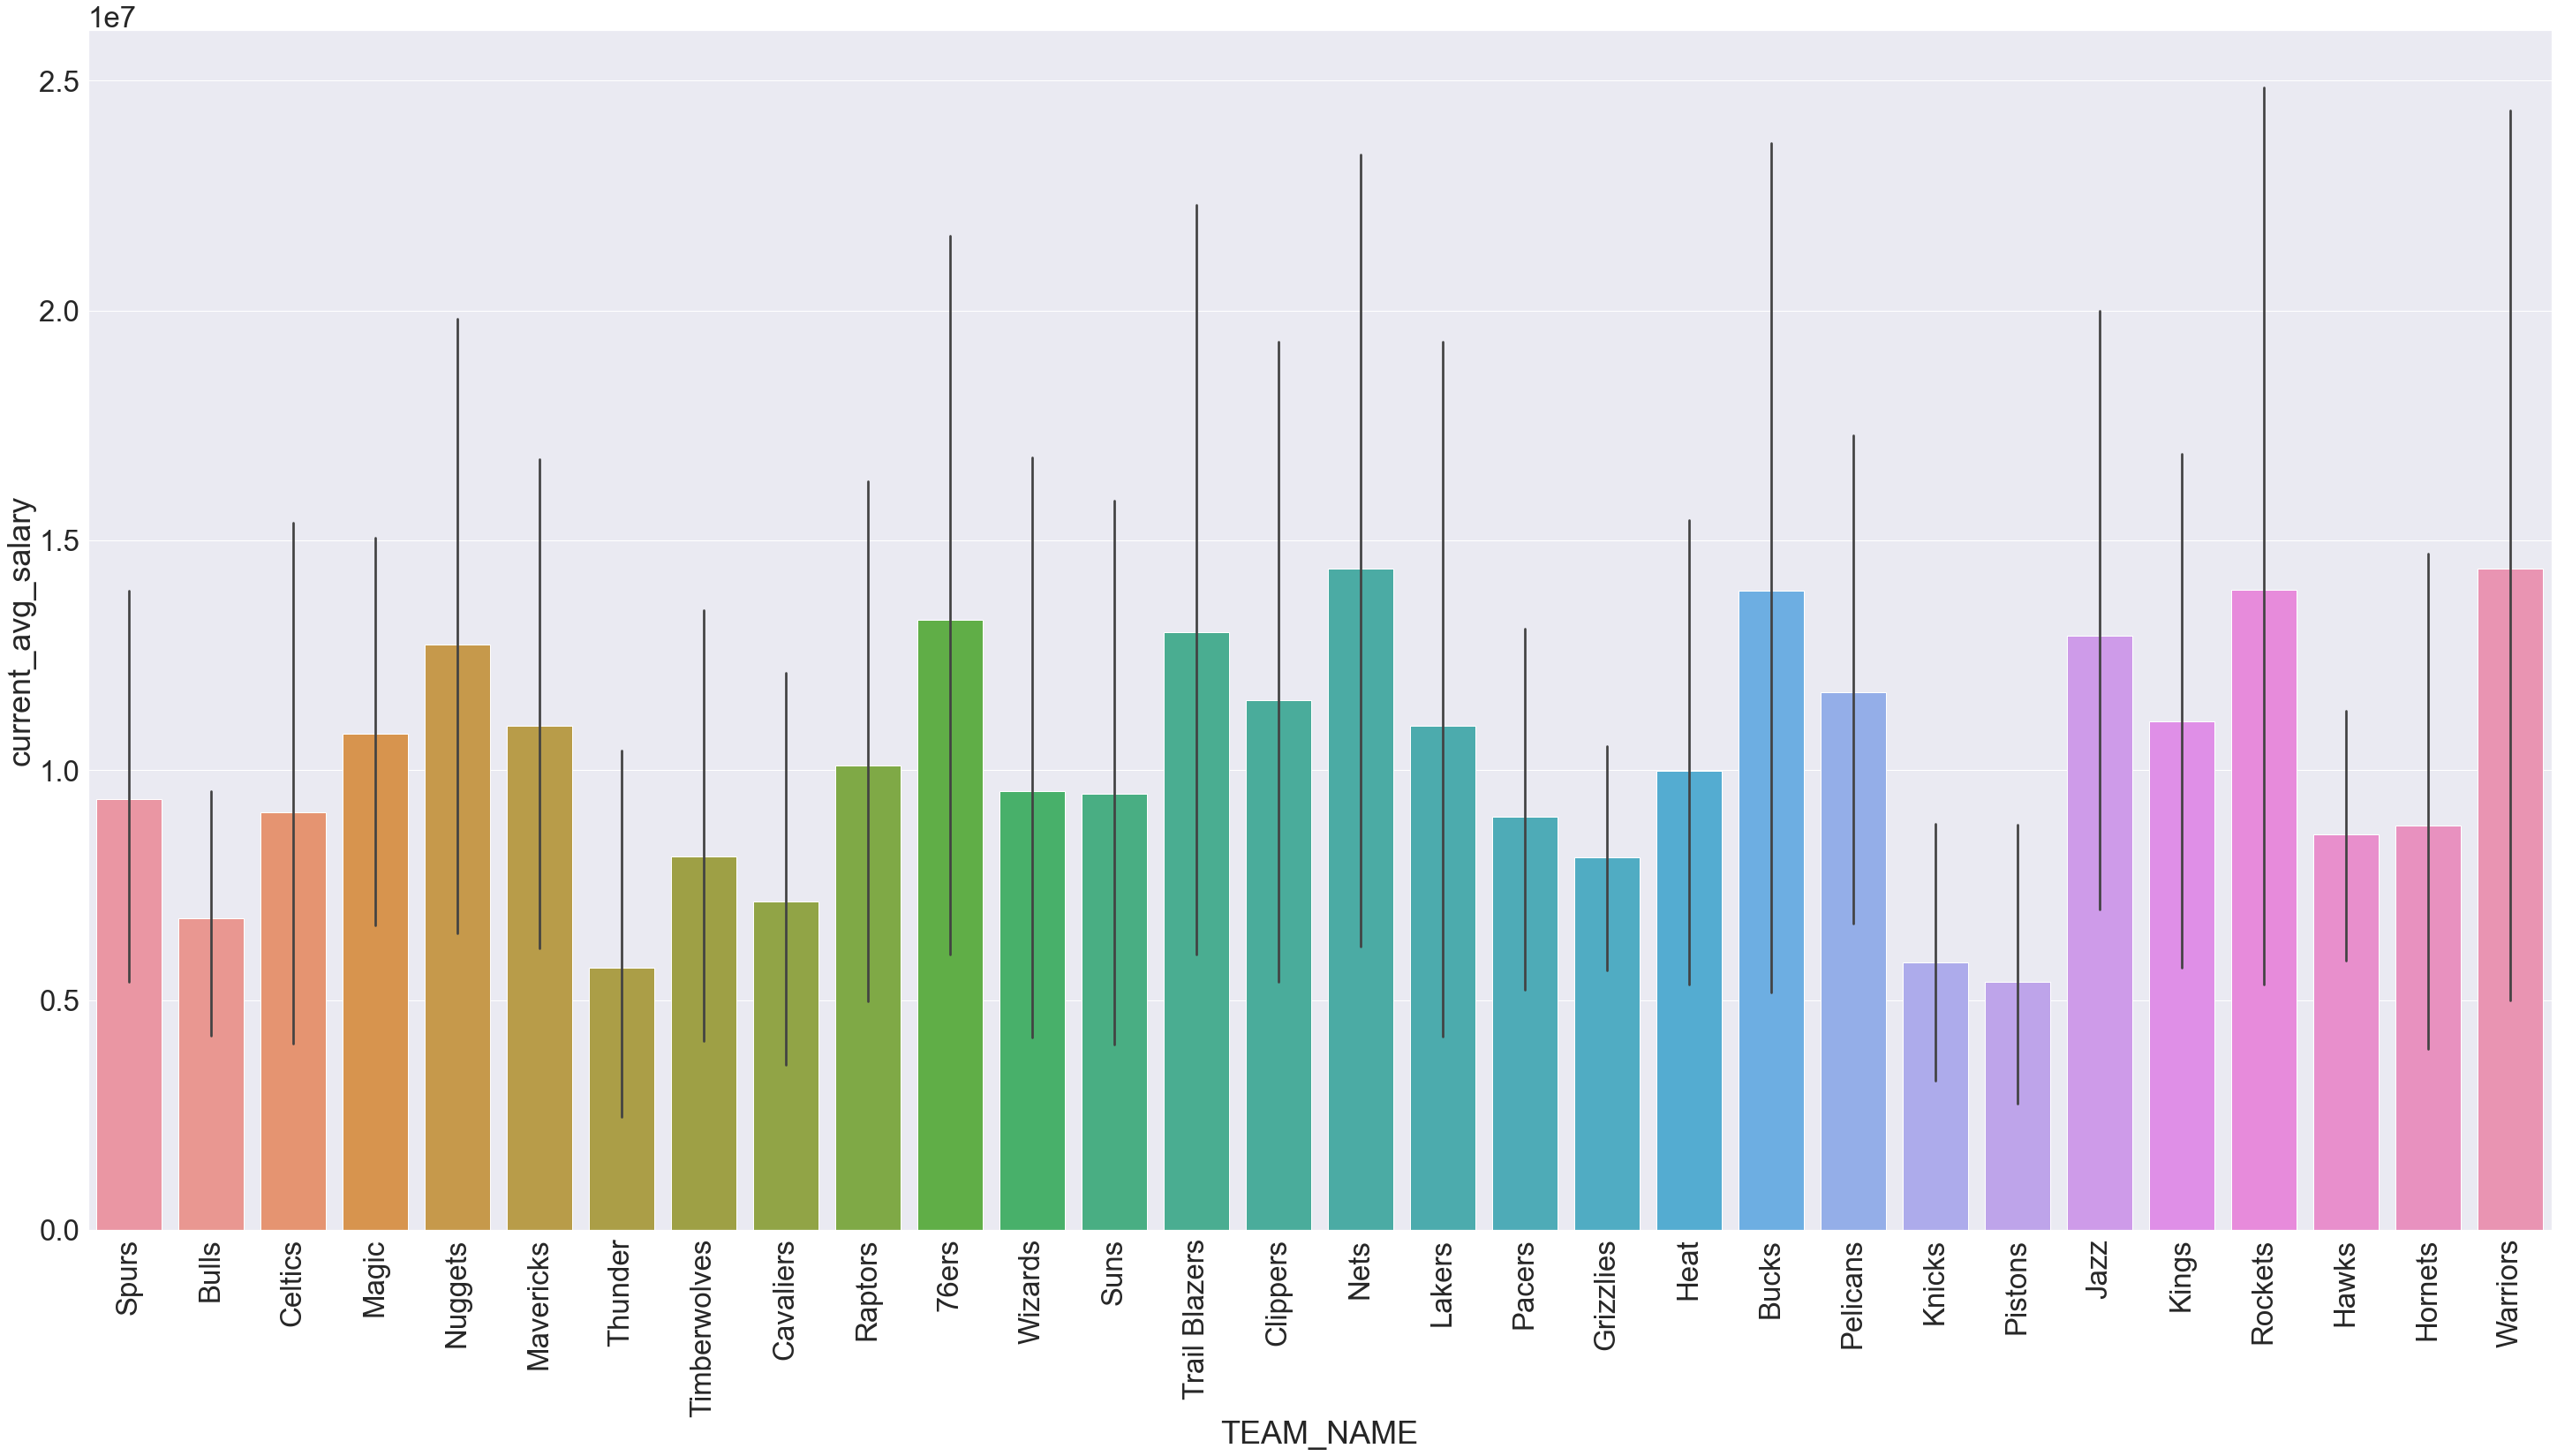

In [32]:
# plot team name against salary
# get rib of the text
sns.set(font_scale=3)
a4_dims = (50, 25)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.barplot(x='TEAM_NAME', y='current_avg_salary', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

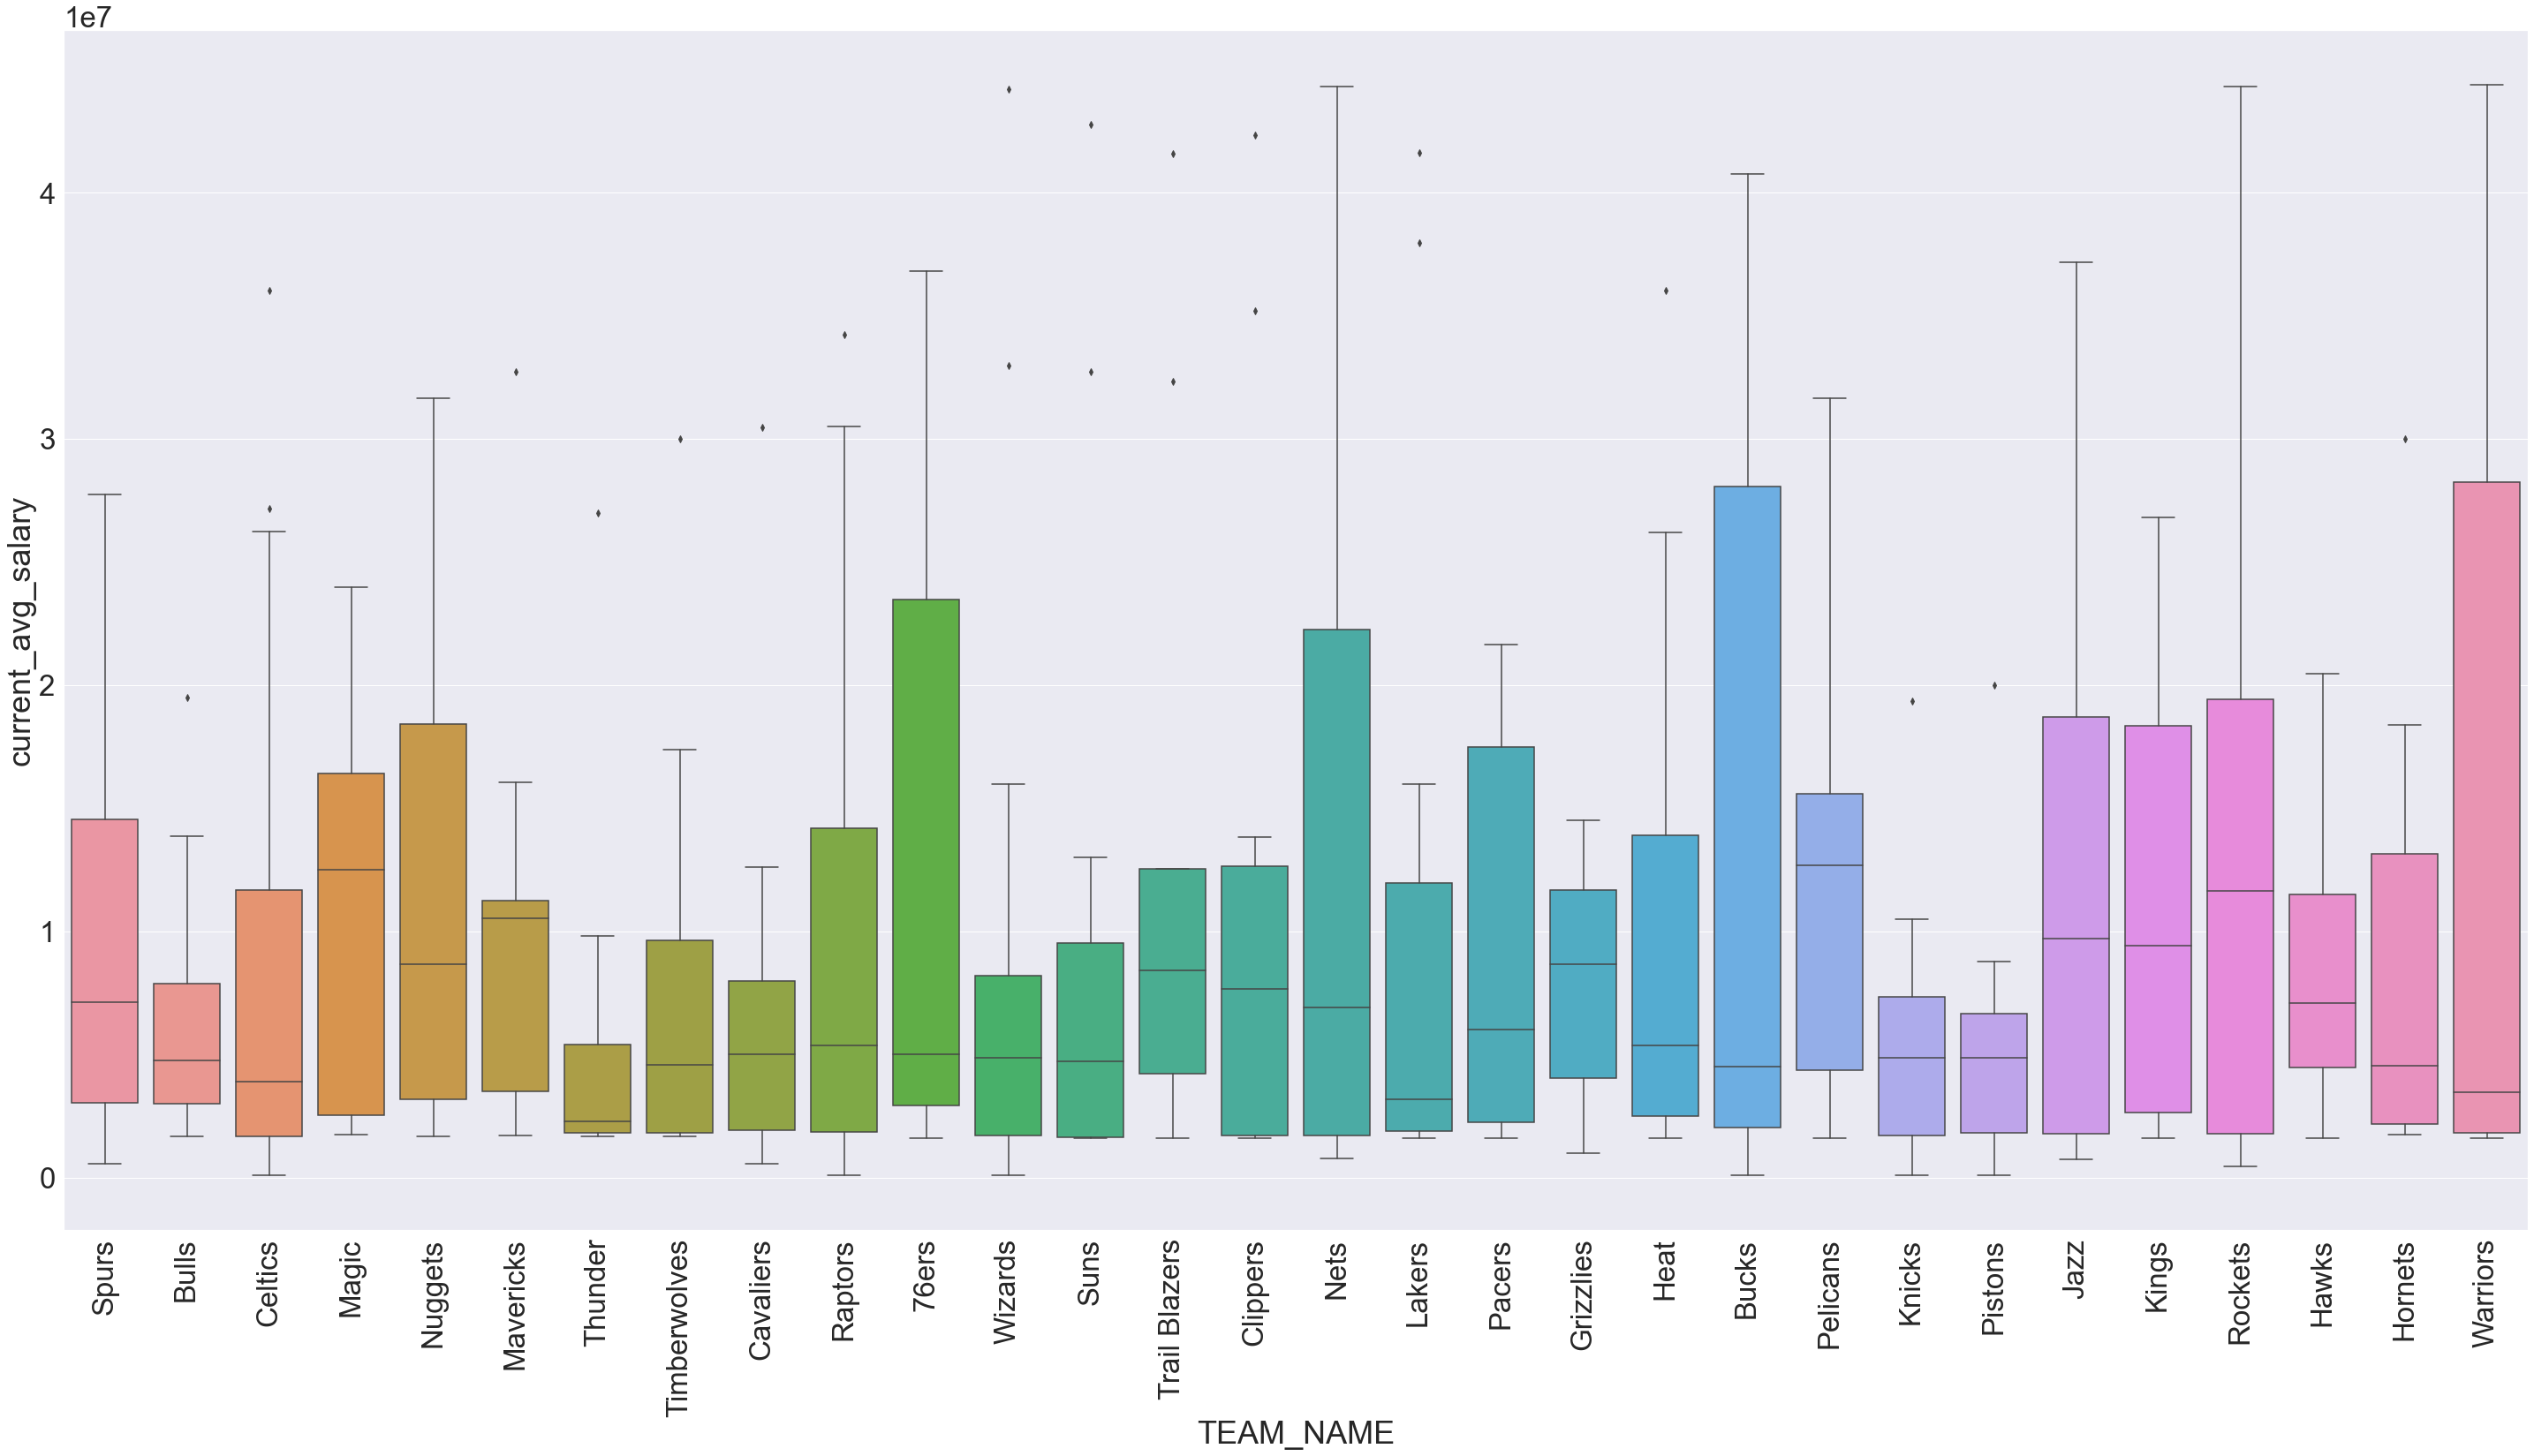

In [33]:
# make boxplot to see if there are outliners
sns.set(font_scale=3)
a4_dims = (50, 25)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(x='TEAM_NAME', y='current_avg_salary', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

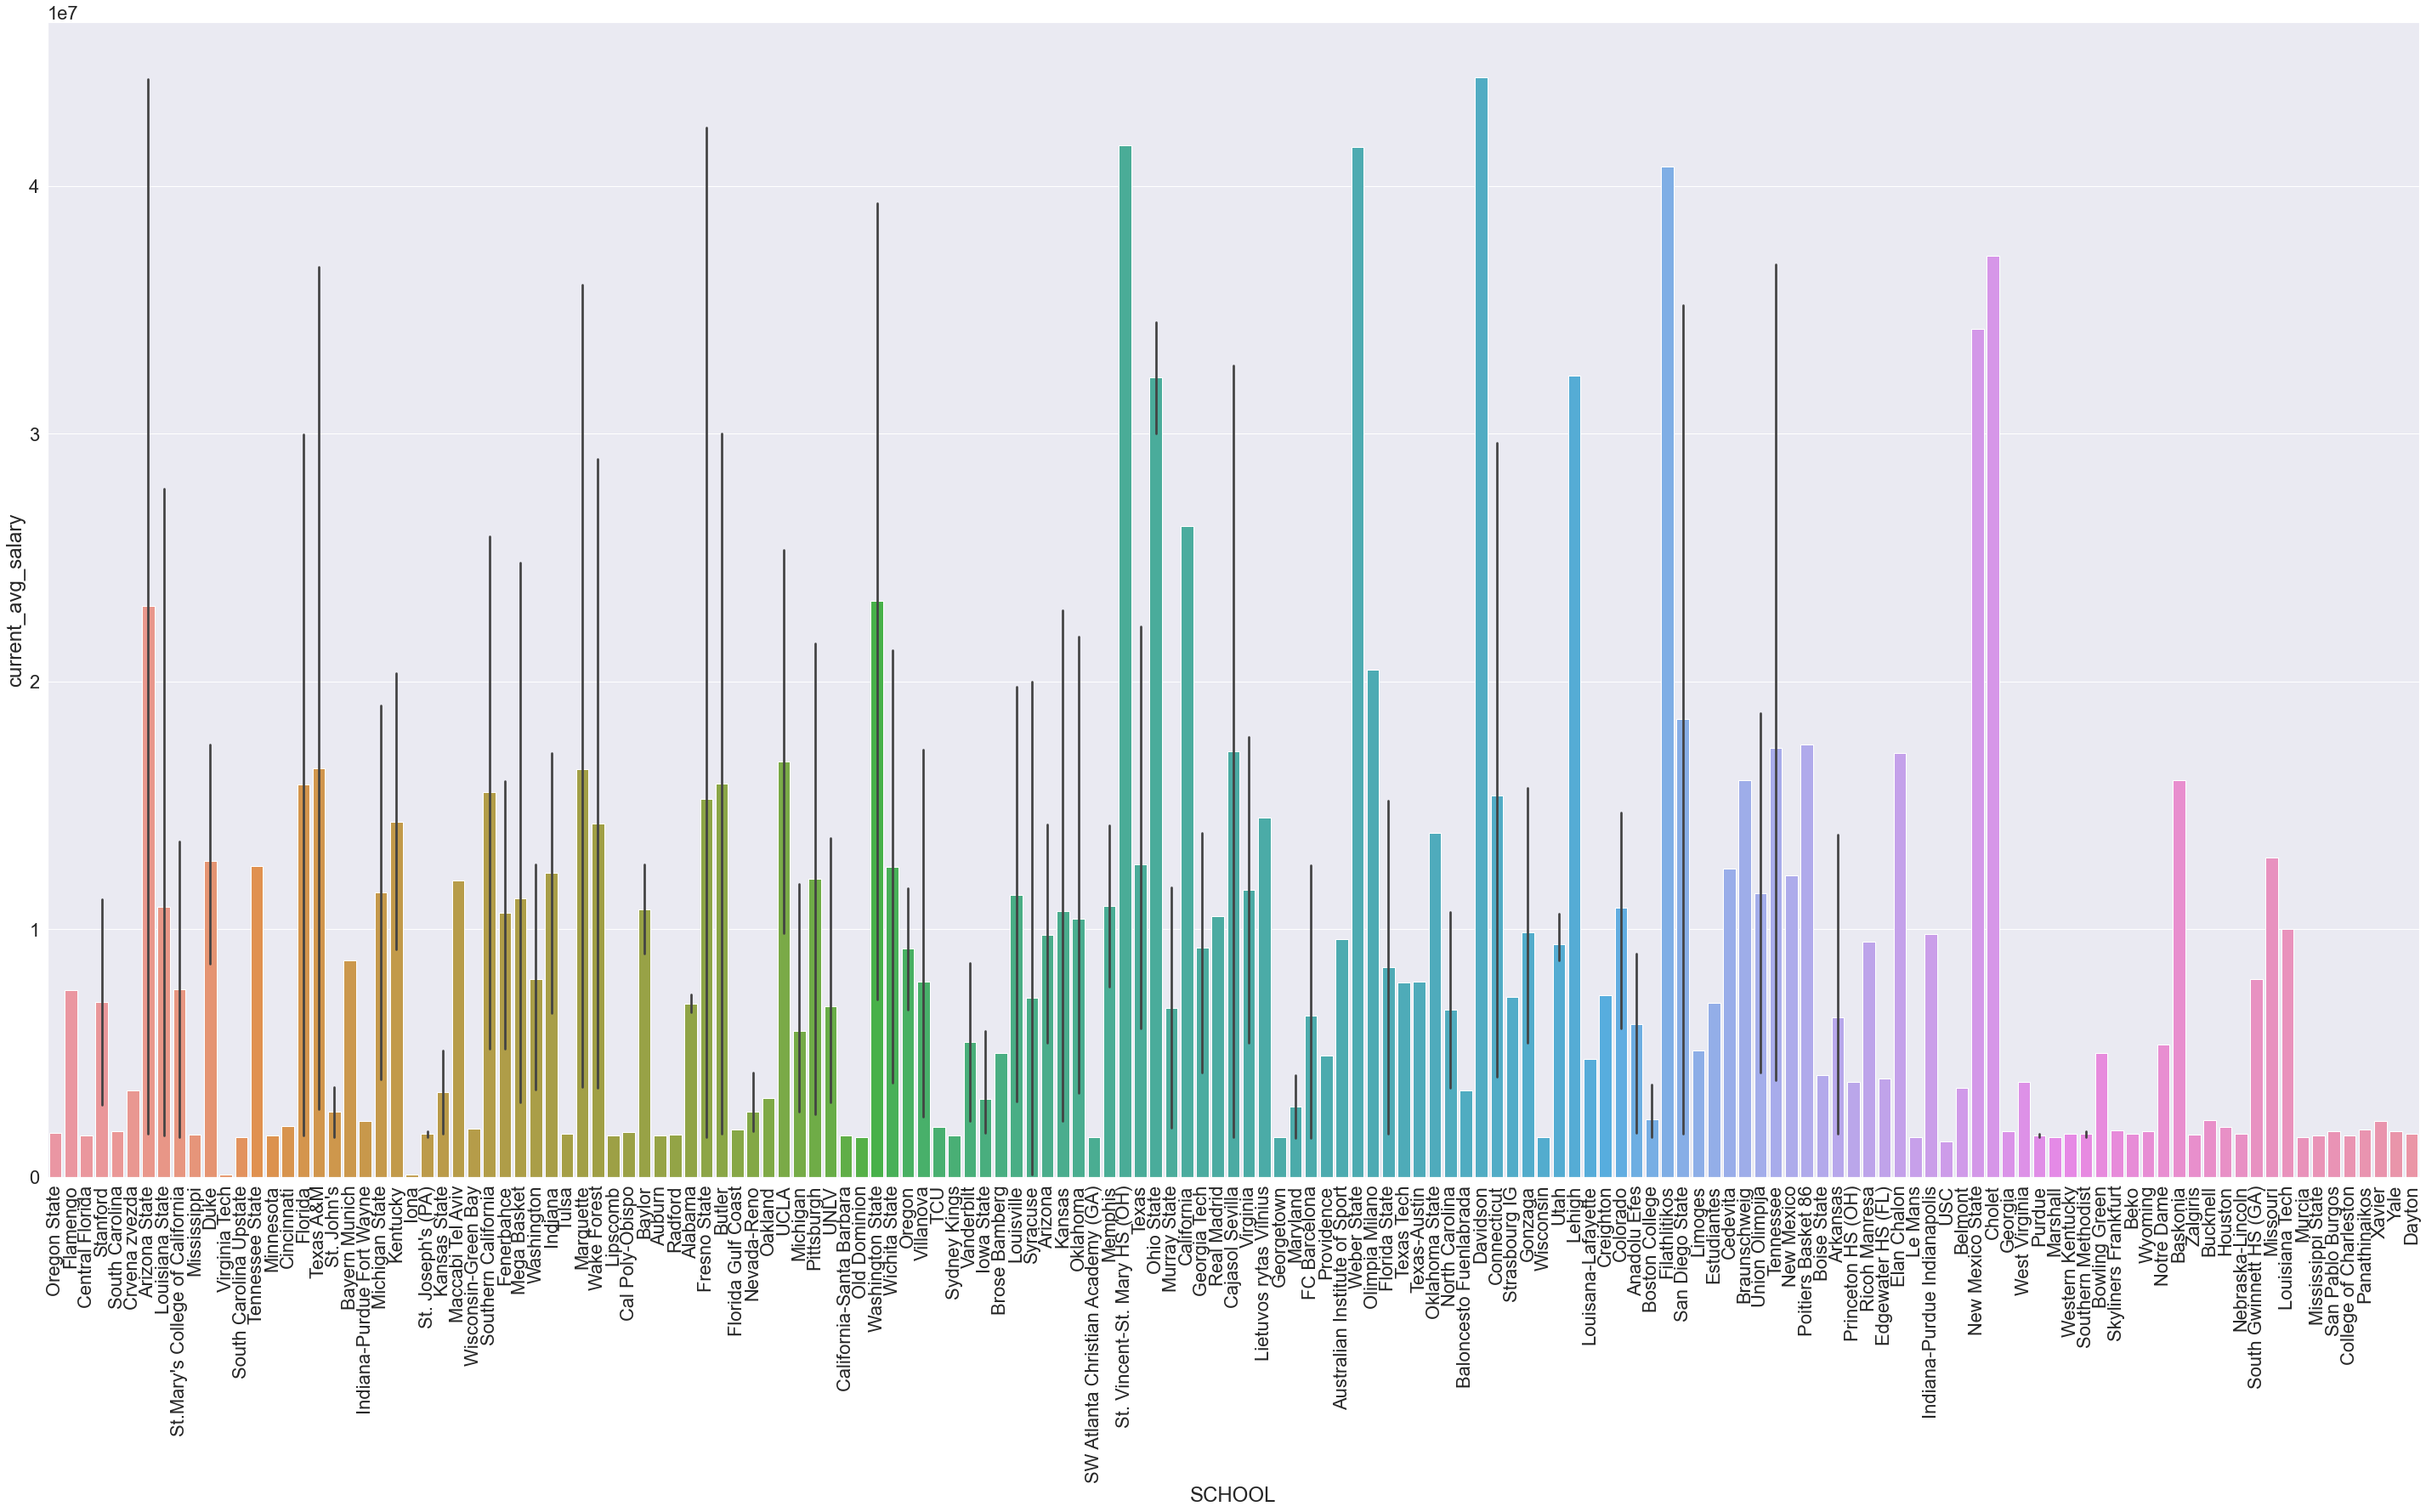

In [49]:
# plot school name against salary using median
sns.set(font_scale=2)
a4_dims = (50, 25)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.barplot(x='SCHOOL', y='current_avg_salary', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90); 

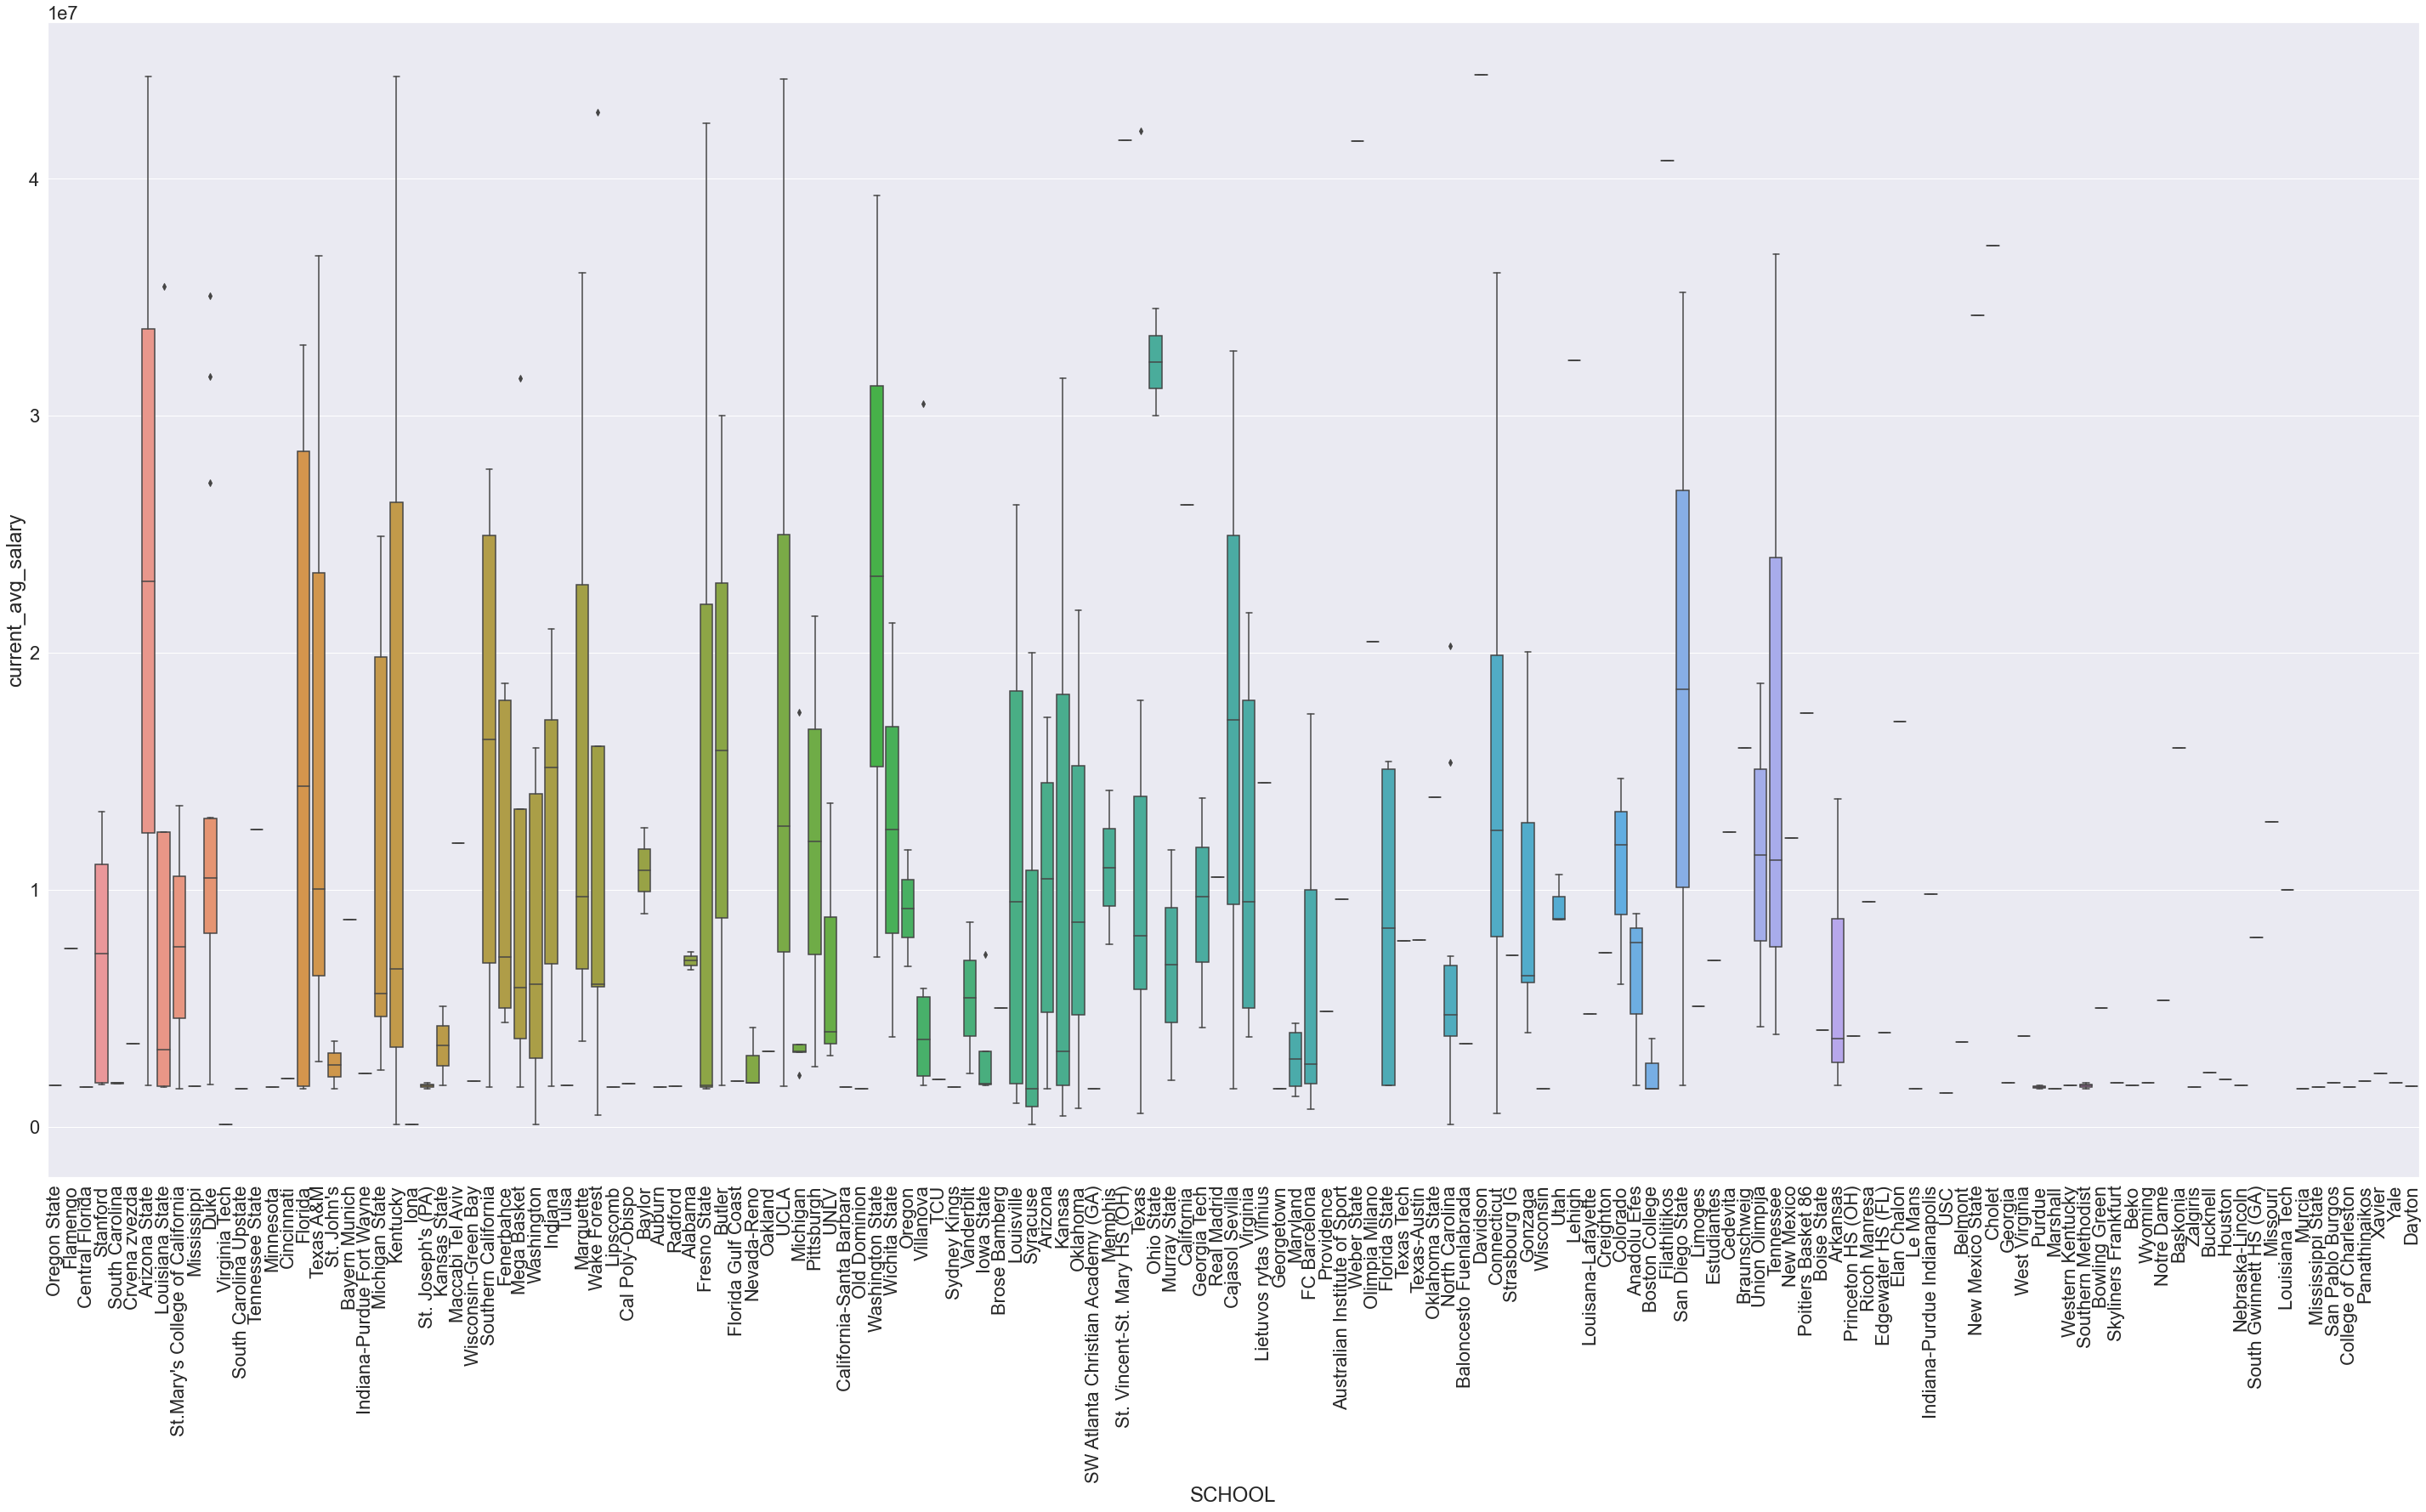

In [50]:
# make boxplot to see if there are outliners
sns.set(font_scale=2)
a4_dims = (50, 25)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(x='SCHOOL', y='current_avg_salary', data=df)
g = plt.xticks(rotation=90)

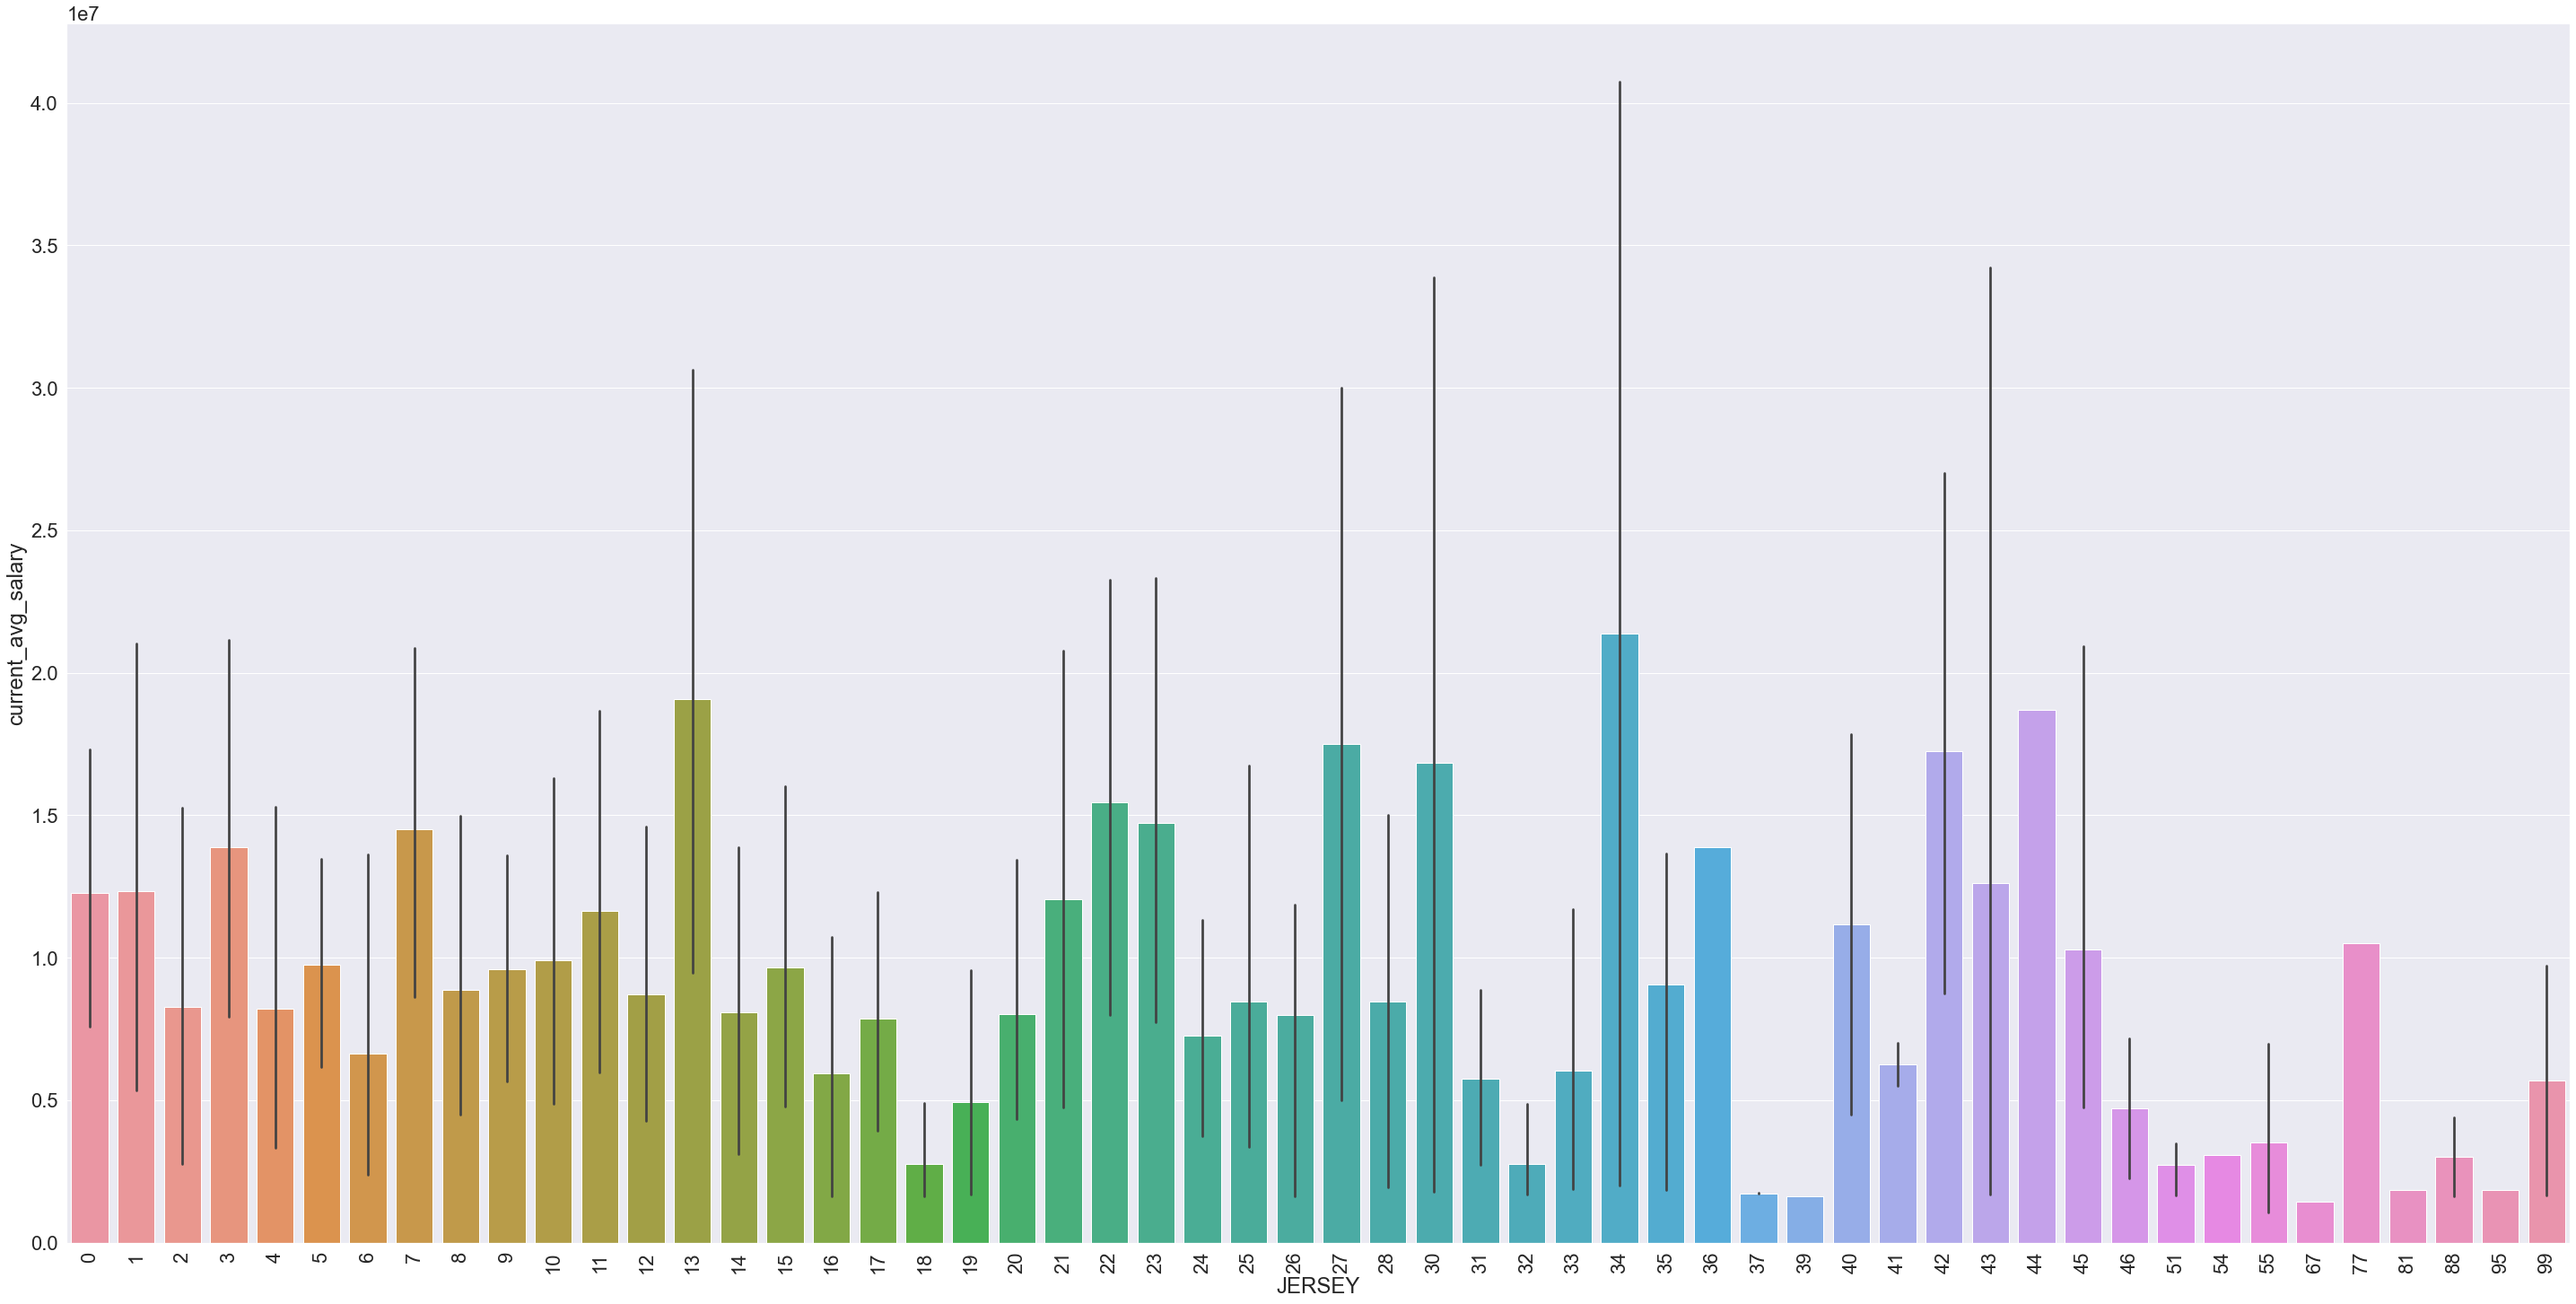

In [51]:
# plot JERSEY against salary using median
sns.set(font_scale=2)
a4_dims = (50, 25)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.barplot(x='JERSEY', y='current_avg_salary', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90); 

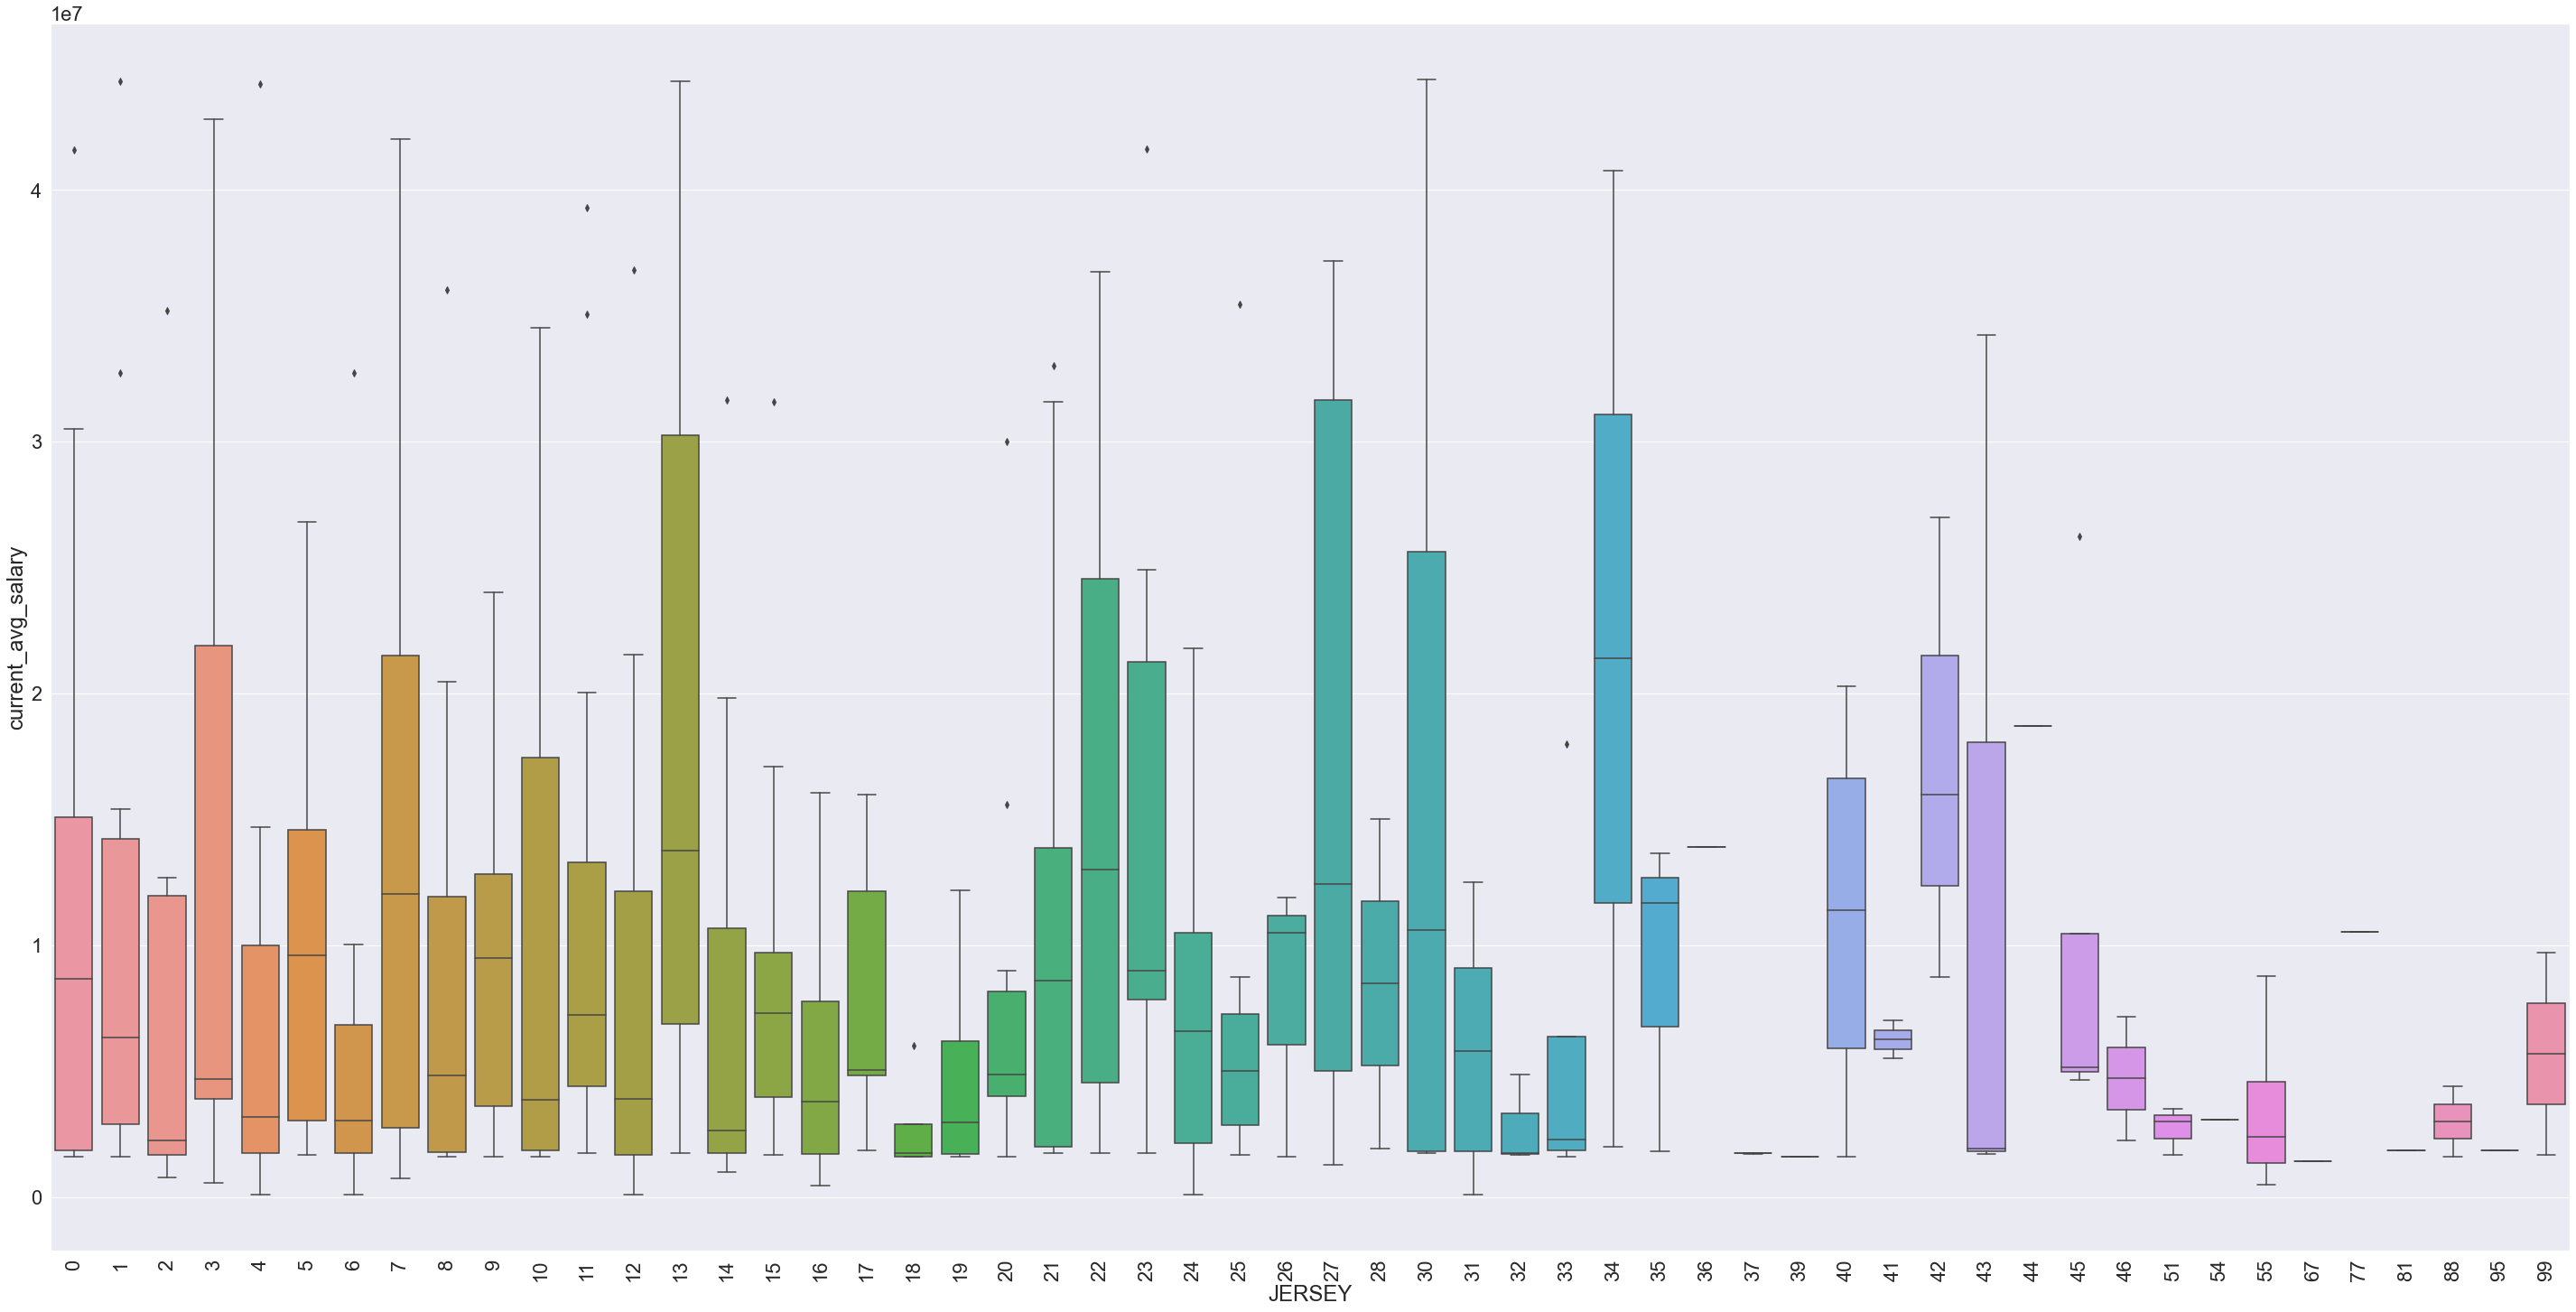

In [52]:
# make boxplot to see if there are outliners
sns.set(font_scale=2)
a4_dims = (50, 25)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(x='JERSEY', y='current_avg_salary', data=df)
g = plt.xticks(rotation=90)

# Additonal Exploratory